**CMSE 201 Project**

Research Question:
What factors contribute most significantly to national happiness levels?

**Date: 04/10/2025**

**0.0.5 Krishayveer Sultania**

$ \textbf{Introduction} $

1.1 Background and Motivation

There has been increasing global interest in measuring the happiness of societies together with and separate from economic progress in isolation. While economic wellbeing and gross domestic product have been the conventional indicators of progress, they don't capture the rich, multifaceted lived experience of people worldwide. To balance, the World Happiness Report was developed as an expansive effort to measure human happiness in the context of self-reported data and a wide range of social, economic, and psychological indicators.

This project will identify the most influential variables over the period from 2015 to 2019 affecting national levels of happiness. Using data from the publically accessible Sustainable Development Solutions Network and Gallup World Poll, the research will analyze the relationship between per capita GDP, social support, freedom, levels of generosity, and perceptions of corruption and the rankings of nations in terms of happiness. By analyzing such correlations cross-sectionally over time and across geographies, the project will seek to uncover long-term patterns and to inform the ways in which different aspects of government, economy, and culture contribute to wellbeing.

Lastly, the research aims to answer the question of: What factors most consistently correlate with national happiness? Do the correlations change over time and what might that teach us about the drivers of a happier country?



1.2 Data Context Statement

The data used in this project comes from Kaggle through the World Happiness Report, compiled by the Sustainable Development Solutions Network using survey data collected by the Gallup World Poll. It includes country-level averages for happiness scores and related indicators such as GDP per capita, social support, life expectancy, freedom, generosity, and perceptions of corruption from 2015 to 2019. While the dataset provides broad global coverage, it excludes individual-level responses and countries lacking consistent survey data. Because the happiness scores are self-reported and influenced by cultural norms, there may be subjective bias. Additionally, some variables may be overrepresented in their influence due to how the report weighs factors. To account for these limitations, my analysis focuses on year-by-year correlations rather than causation, acknowledges data gaps, and avoids overinterpreting weaker relationships.

$ \textbf{Methedology} $

Libraries and Dataset setup!

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


sns.set(style='whitegrid')


In [7]:
years = [2015, 2016, 2017, 2018, 2019]
data = {}

for year in years:
    file_name = f"{year}.csv"
    df = pd.read_csv(file_name).dropna() 
    data[year] = df
    print(f"\n{year} Data (after dropping NaNs):")
    display(df.head())



2015 Data (after dropping NaNs):


Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   
3                   0.88521  0.66973                        0.36503   
4                   0.90563  0.63297                        0.32957   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
3     0.34699            2.46531  
4     0.45811            2.45176


2016 Data (after dropping NaNs):


Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   
3       Norway  Western Europe               4            7.498   
4      Finland  Western Europe               5            7.413   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   
3                      7.421                      7.575   
4                      7.351                      7.475   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   
3                   1.57744  1.12690                   0.79579  0.59609   
4                   1.40598  1.13464                   0.81091  0.57104   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.69463  
2                        0.14975     0.47678            2.83137  
3                        0.35776     0.37895            2.66465  
4                        0.41004     0.25492            2.82596


2017 Data (after dropping NaNs):


Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0       Norway               1            7.537      7.594445     7.479556   
1      Denmark               2            7.522      7.581728     7.462272   
2      Iceland               3            7.504      7.622030     7.385970   
3  Switzerland               4            7.494      7.561772     7.426227   
4      Finland               5            7.469      7.527542     7.410458   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   
3                  1.564980  1.516912                  0.858131  0.620071   
4                  1.443572  1.540247                  0.809158  0.617951   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
3    0.290549                       0.367007           2.276716  
4    0.245483                       0.382612           2.430182


2018 Data (after dropping NaNs):


Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   
3             4           Iceland  7.495           1.343           1.644   
4             5       Switzerland  7.487           1.420           1.549   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   
3                    0.914                         0.677       0.353   
4                    0.927                         0.660       0.256   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
3                      0.138  
4                      0.357


2019 Data (after dropping NaNs):


Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

The above dataset has different names for variables across years and region is onlly mentioned for the first two years. Hence, we will have to make dictionaries to map columns for each year to general variable. The 5 variables chosen are Economy, Family, Freedom, Trust and Generosity. We can also change the names of the columns but this is easier and simpler.

In [9]:
column_mapping = {
    "Economy": {
        2015: "Economy (GDP per Capita)",
        2016: "Economy (GDP per Capita)",
        2017: "Economy..GDP.per.Capita.",
        2018: "GDP per capita",
        2019: "GDP per capita"
    },
    "Family": {
        2015: "Family",
        2016: "Family",
        2017: "Family",
        2018: "Social support",
        2019: "Social support"
    },
    "Freedom": {
        2015: "Freedom",
        2016: "Freedom",
        2017: "Freedom",
        2018: "Freedom to make life choices",
        2019: "Freedom to make life choices"
    },
    "Trust": {
        2015: "Trust (Government Corruption)",
        2016: "Trust (Government Corruption)",
        2017: "Trust..Government.Corruption.",
        2018: "Perceptions of corruption",
        2019: "Perceptions of corruption"
    },
    "Generosity": {
        2015: "Generosity",
        2016: "Generosity",
        2017: "Generosity",
        2018: "Generosity",
        2019: "Generosity"
    }
}


happiness_score_col = {
    2015: "Happiness Score",
    2016: "Happiness Score",
    2017: "Happiness.Score",
    2018: "Score",
    2019: "Score"
}


region_col = {
    2015: "Region",
    2016: "Region",
    2017: None,  
    2018: None,
    2019: None
}

We can define a function to create plots for each variable against the hapiness score. The function will take in the data set, year and the x variable and then output the graph. This automation makes graphing much easier.

In [11]:
from scipy.stats import pearsonr

def plot_variable_vs_happiness_dynamic(df, year, x_var_key):
    x_col = column_mapping[x_var_key][year]
    y_col = happiness_score_col[year]
    hue = region_col[year]

    plt.figure(figsize=(12, 8))

    if hue and hue in df.columns:
        sns.scatterplot(x=x_col, y=y_col, data=df, hue=df[hue], s=100, alpha=0.7)
        plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        sns.scatterplot(x=x_col, y=y_col, data=df, s=100, alpha=0.7)

    plt.title(f'Happiness Score vs {x_var_key} ({year})', fontsize=16)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel("Happiness Score", fontsize=12)

    plt.tight_layout()
    plt.show()


In [12]:
def plot_variable_all_years(x_var_key):
    print(f"\n\n### {x_var_key} vs Happiness Score (2015–2019) ###\n")
    for year in years:
        df = data[year]
        plot_variable_vs_happiness_dynamic(df, year, x_var_key)




### Economy vs Happiness Score (2015–2019) ###



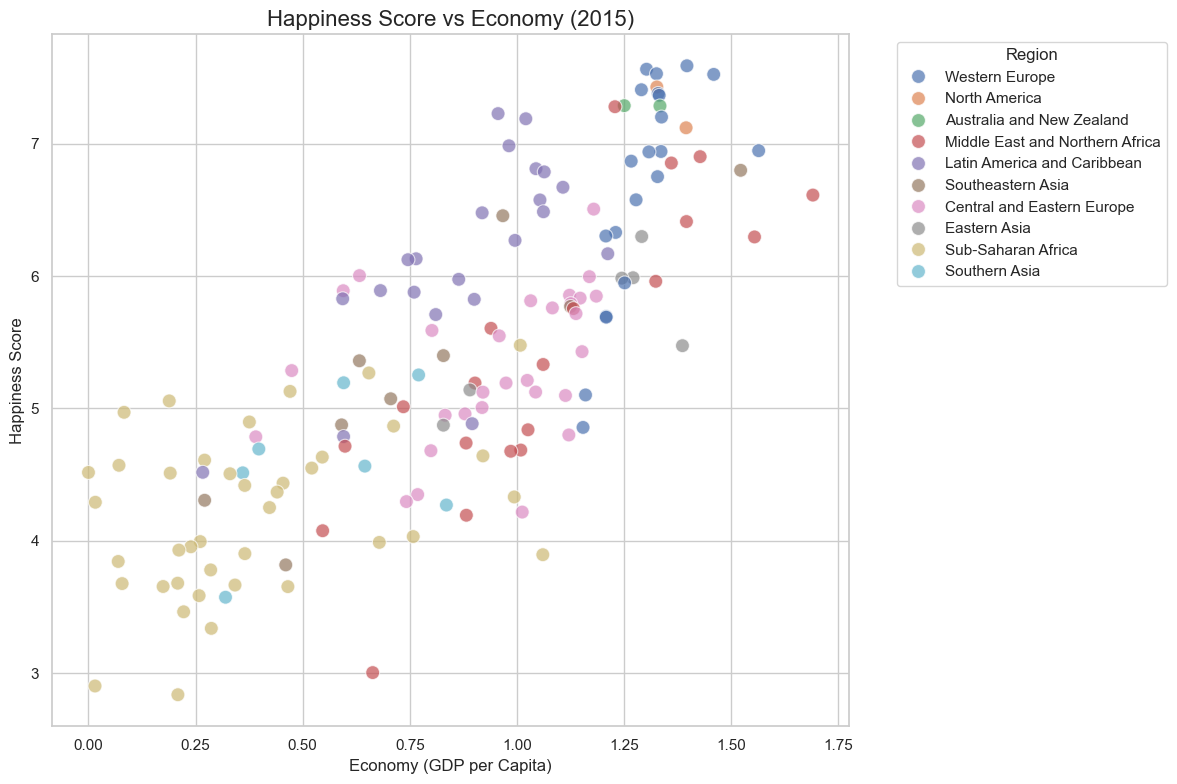

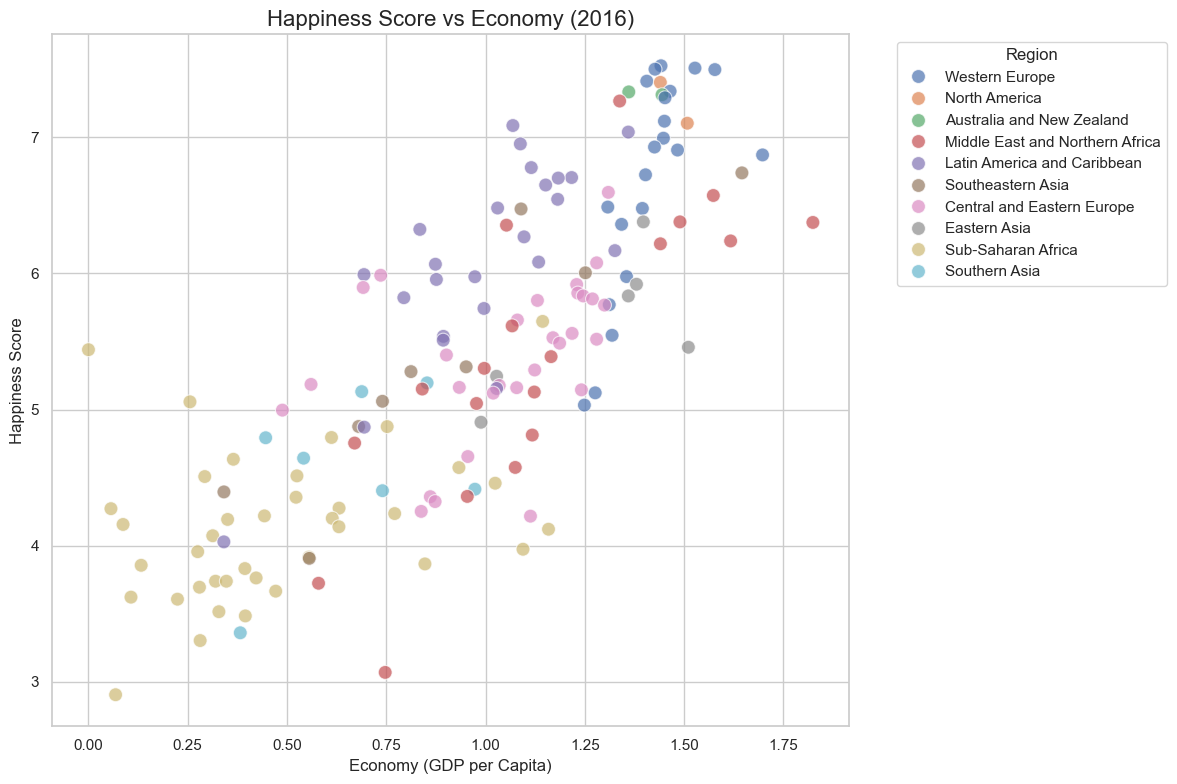

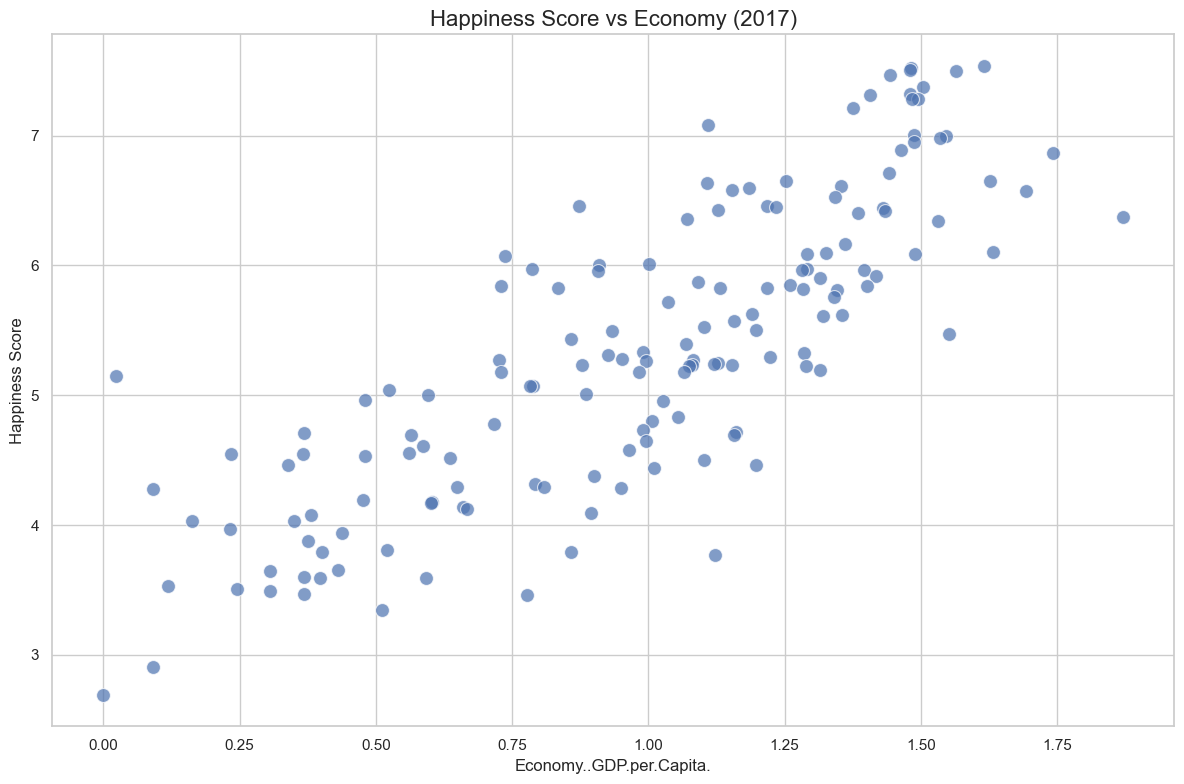

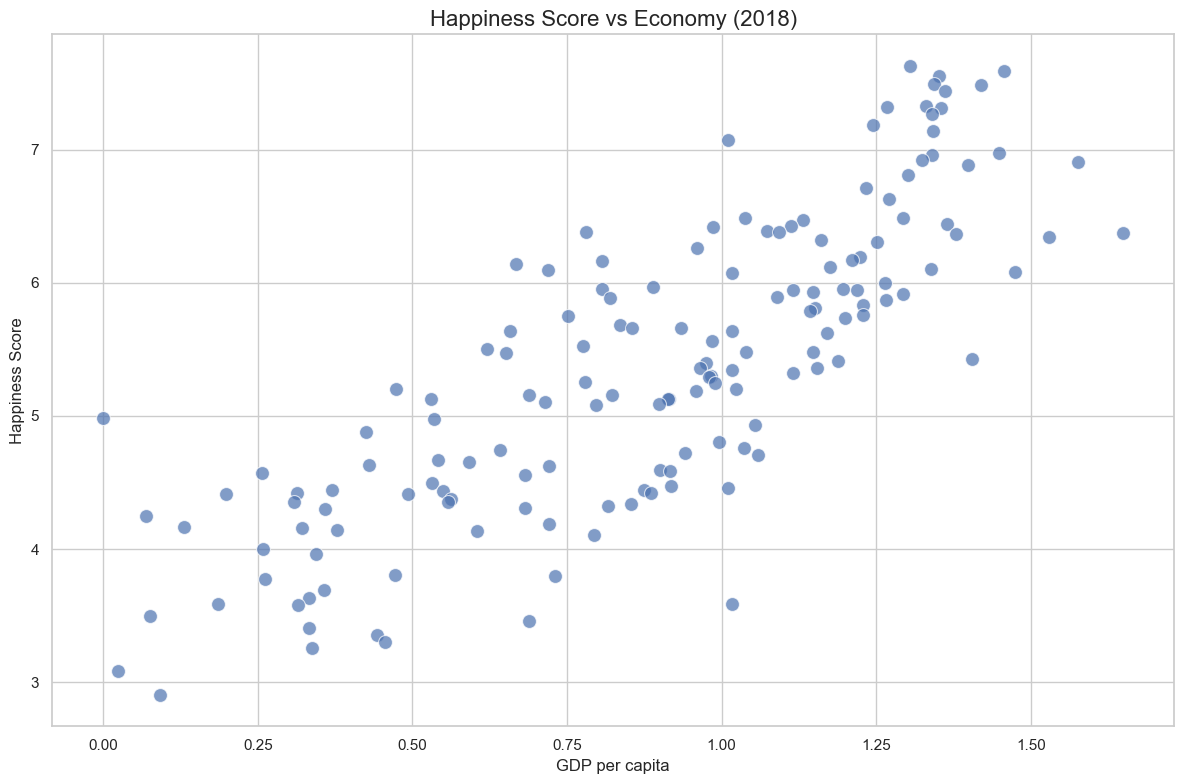

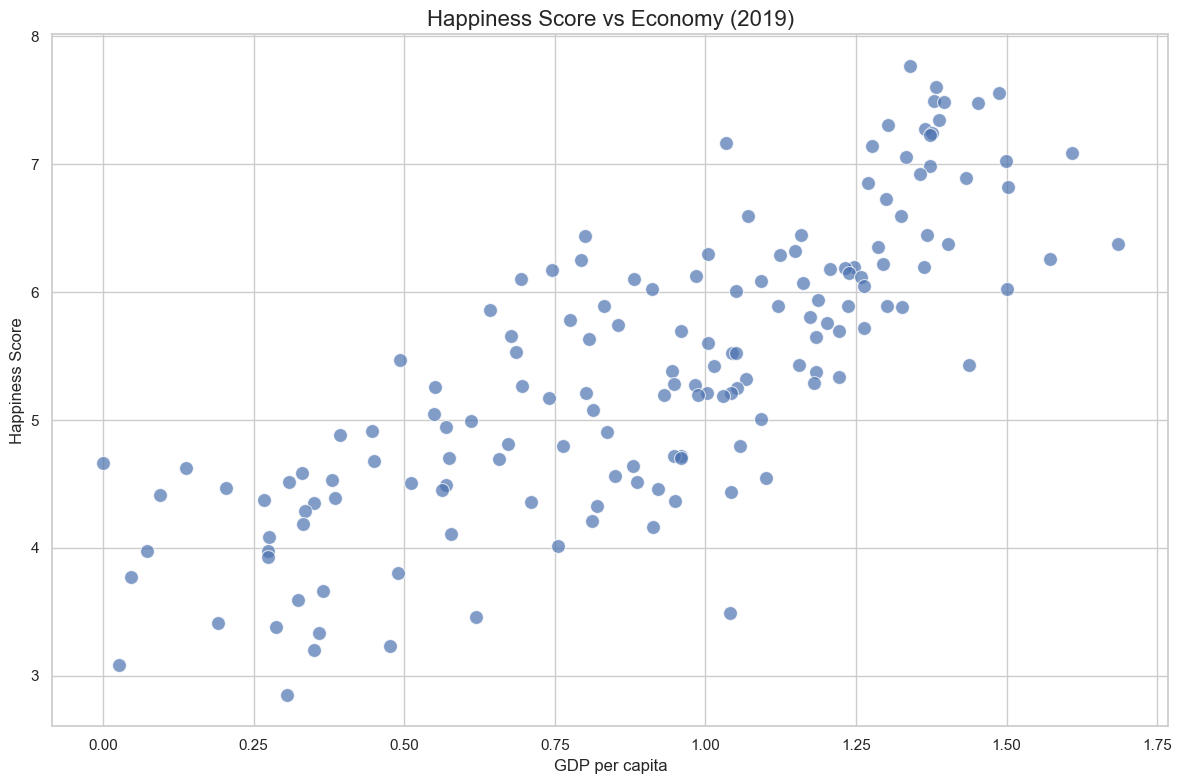

In [13]:
plot_variable_all_years("Economy")




### Family vs Happiness Score (2015–2019) ###



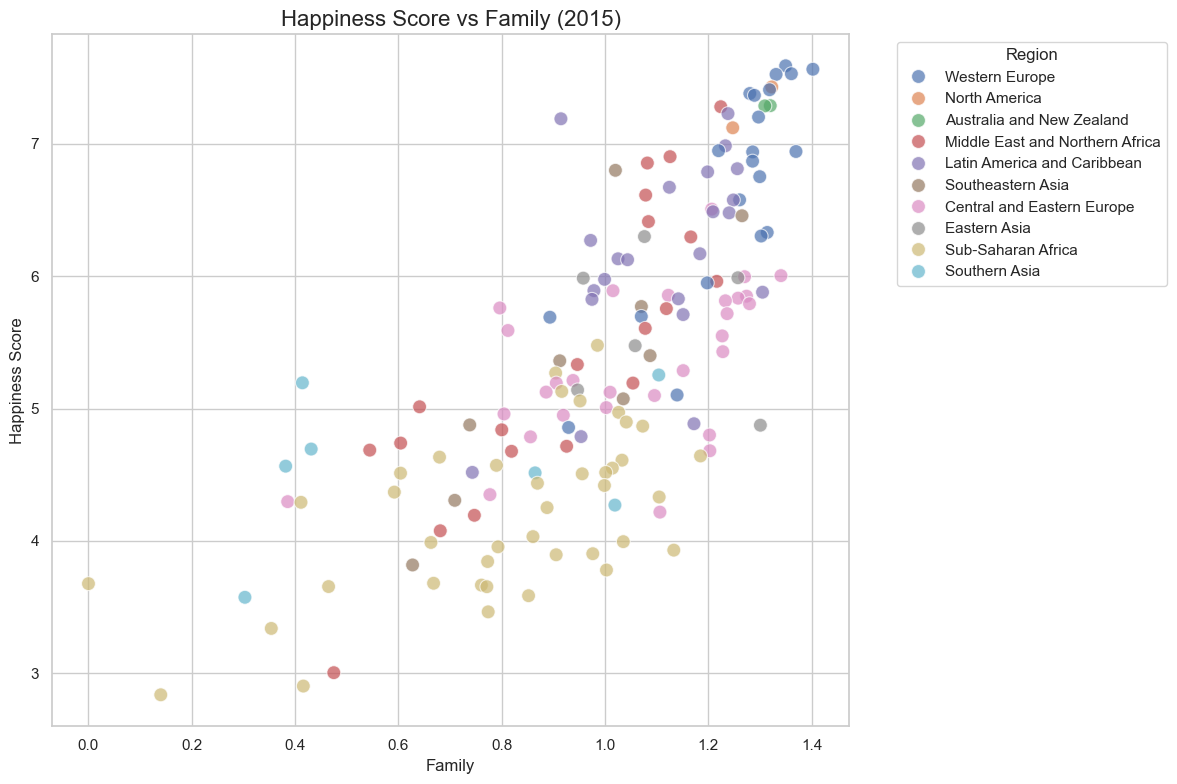

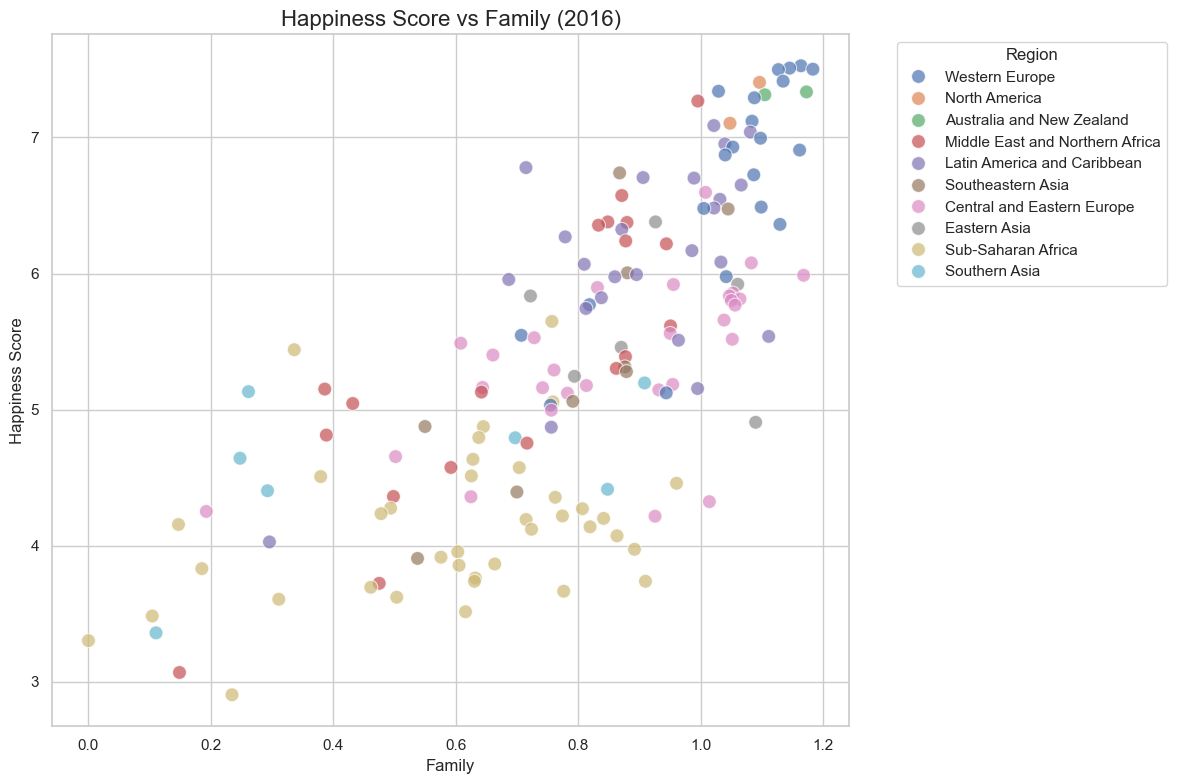

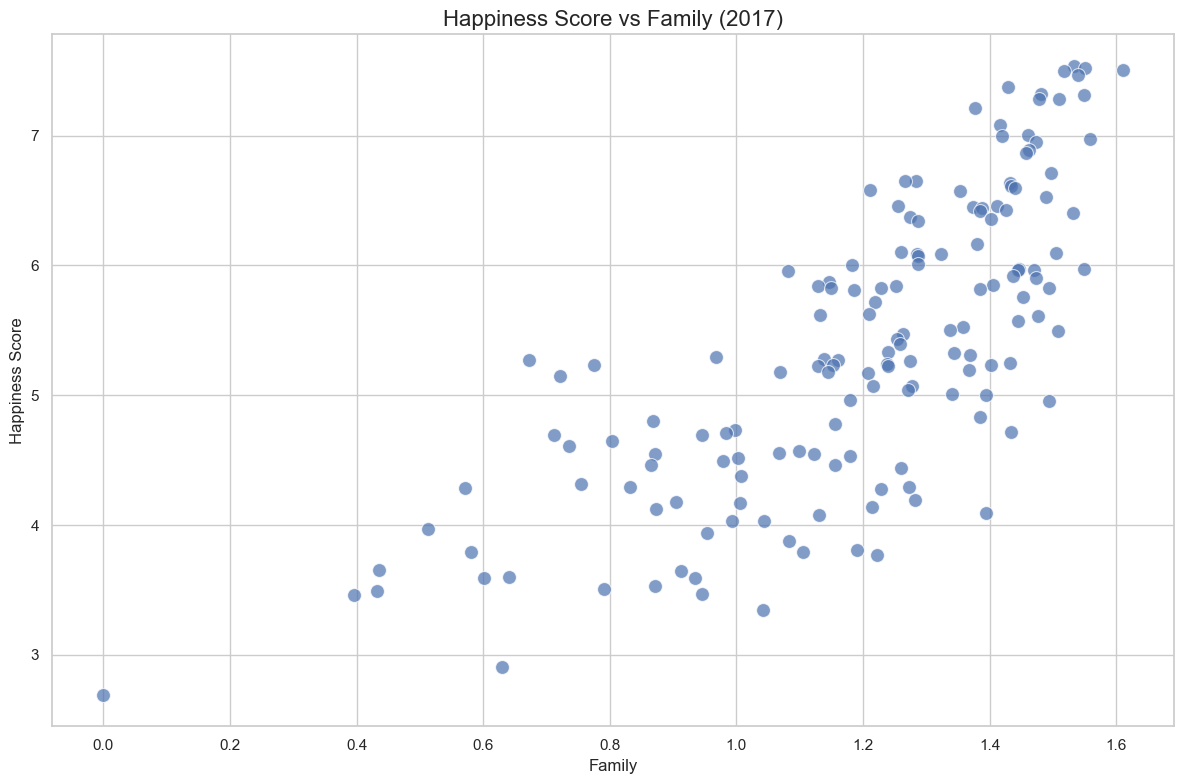

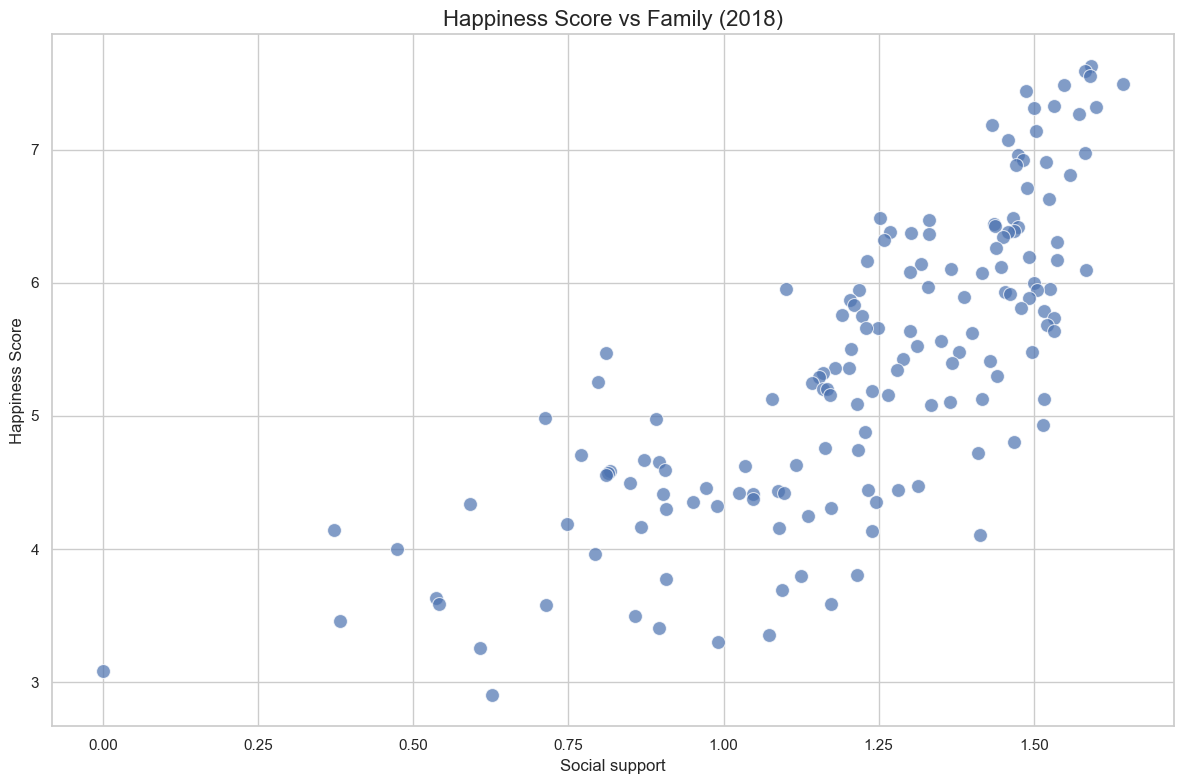

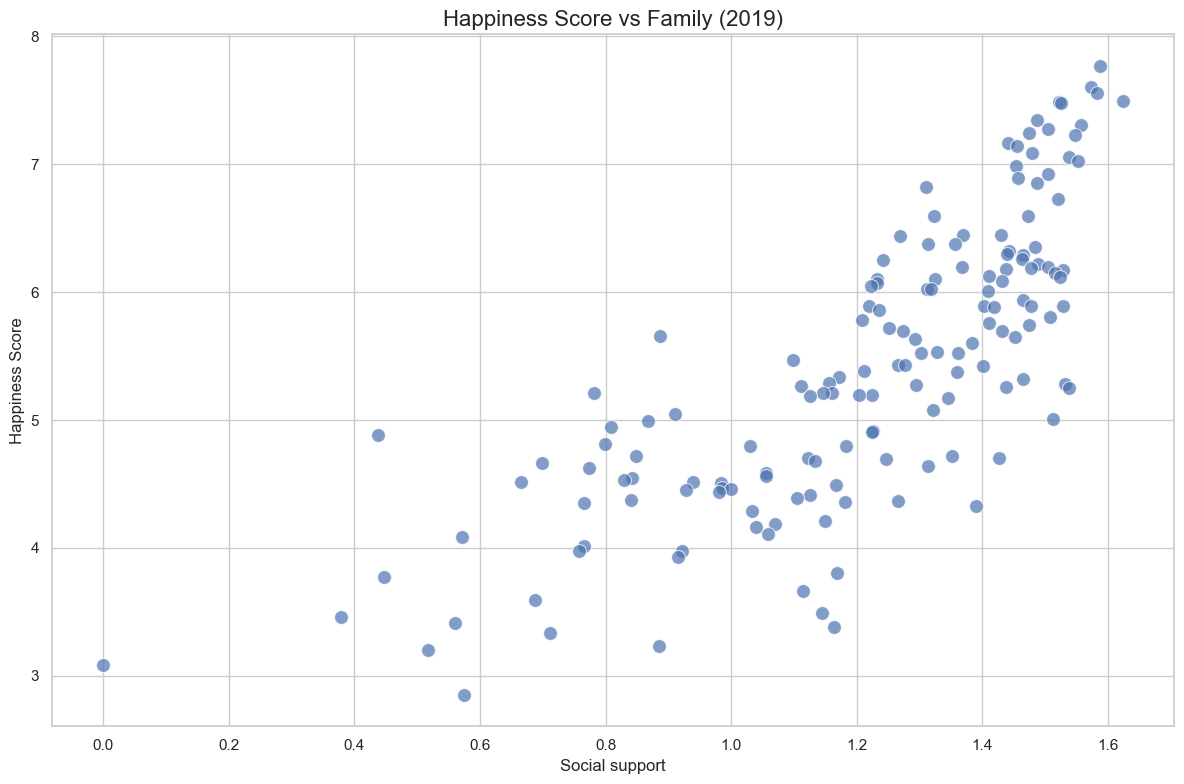

In [14]:
plot_variable_all_years("Family")



### Freedom vs Happiness Score (2015–2019) ###



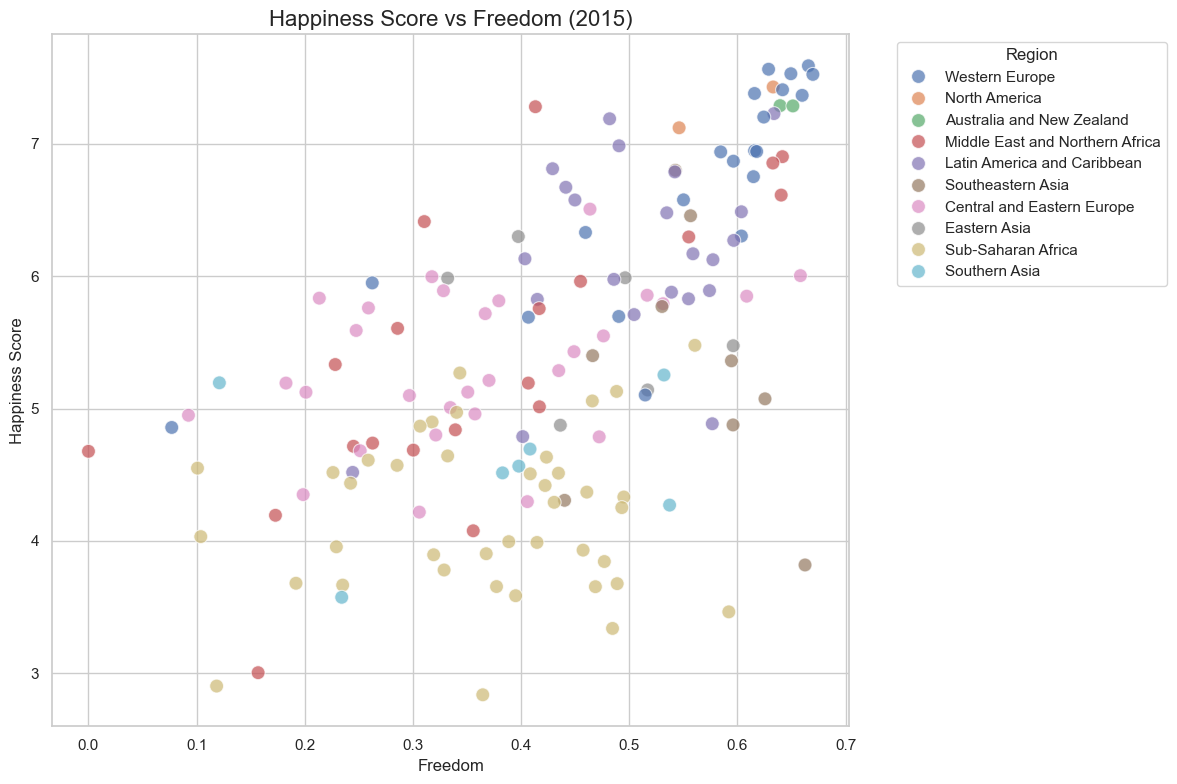

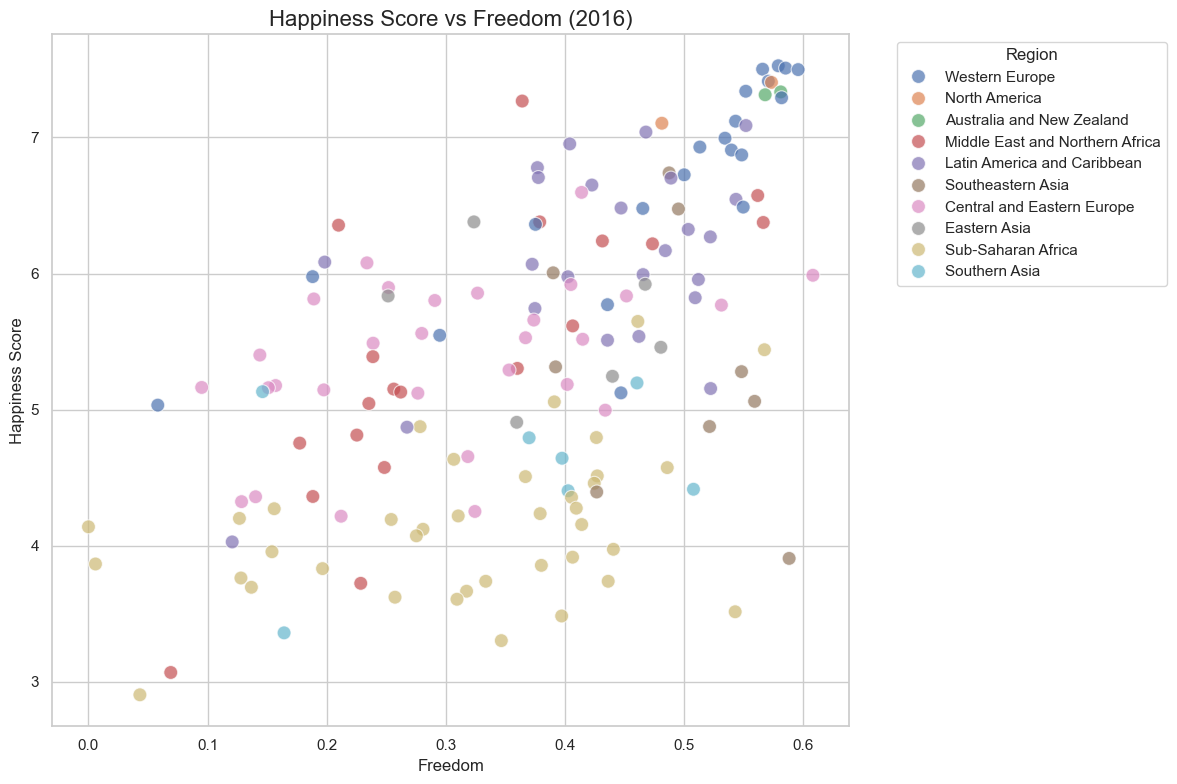

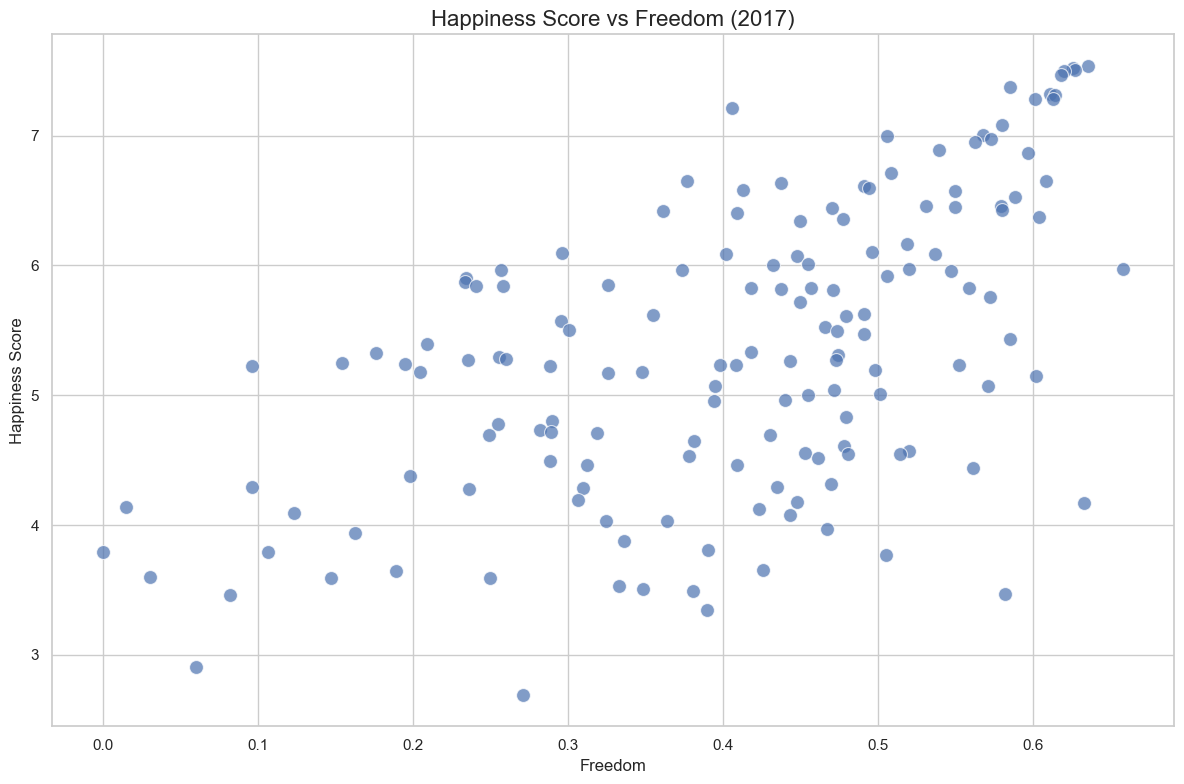

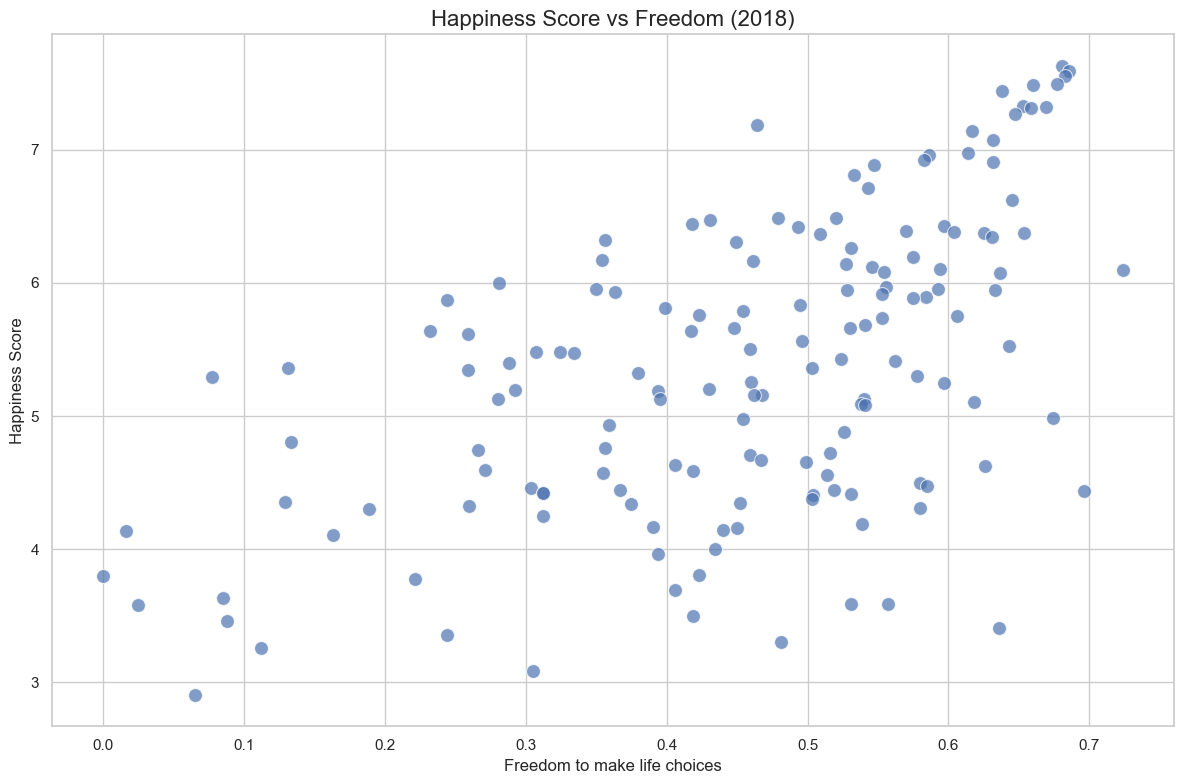

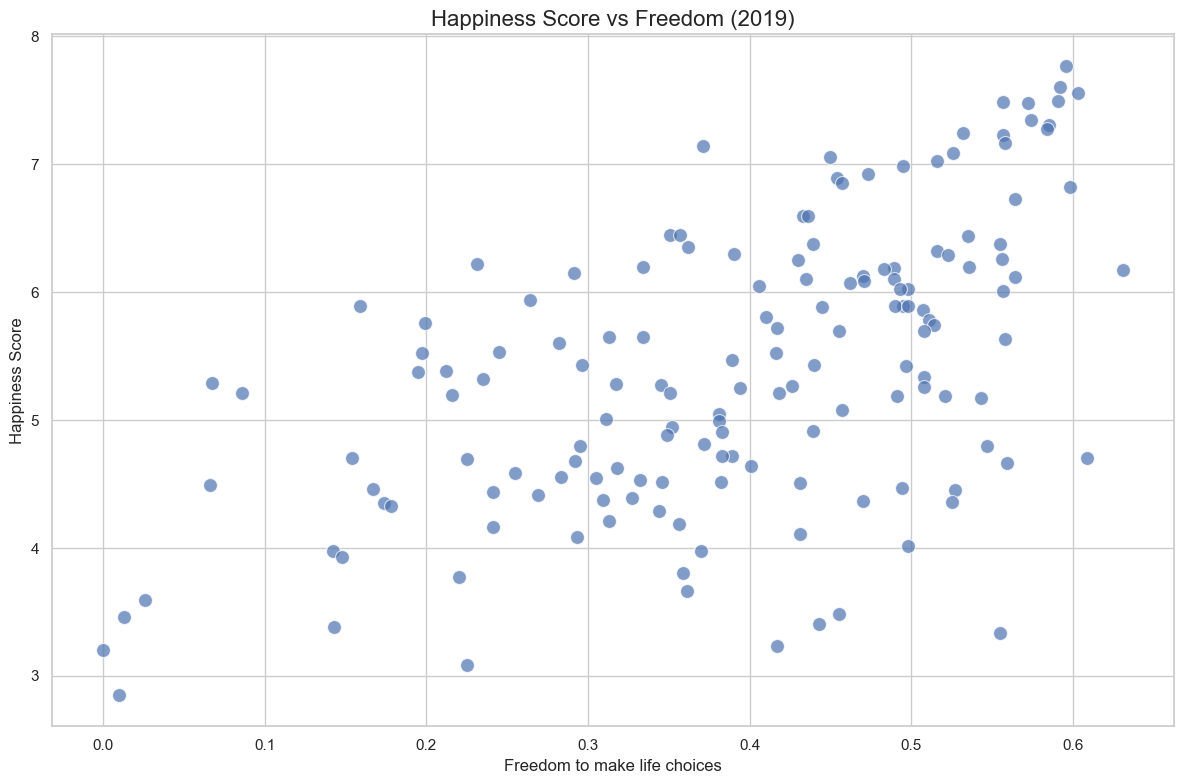

In [15]:
plot_variable_all_years("Freedom")



### Trust vs Happiness Score (2015–2019) ###



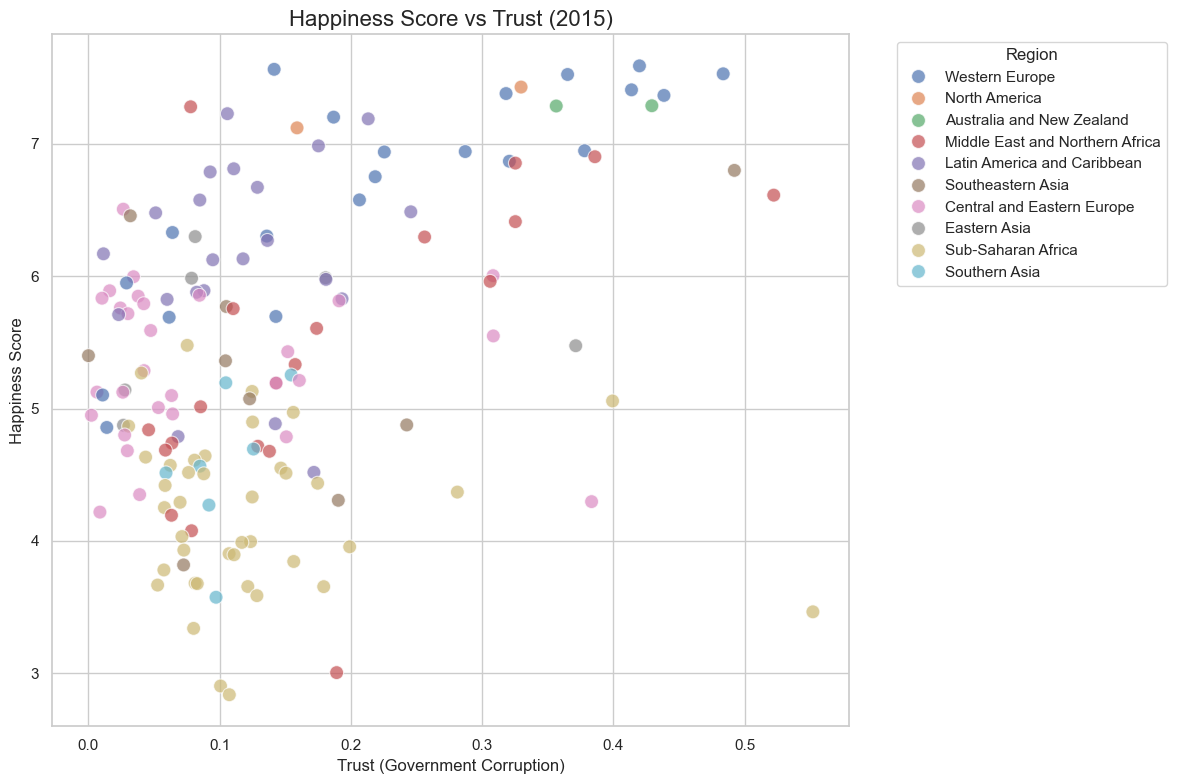

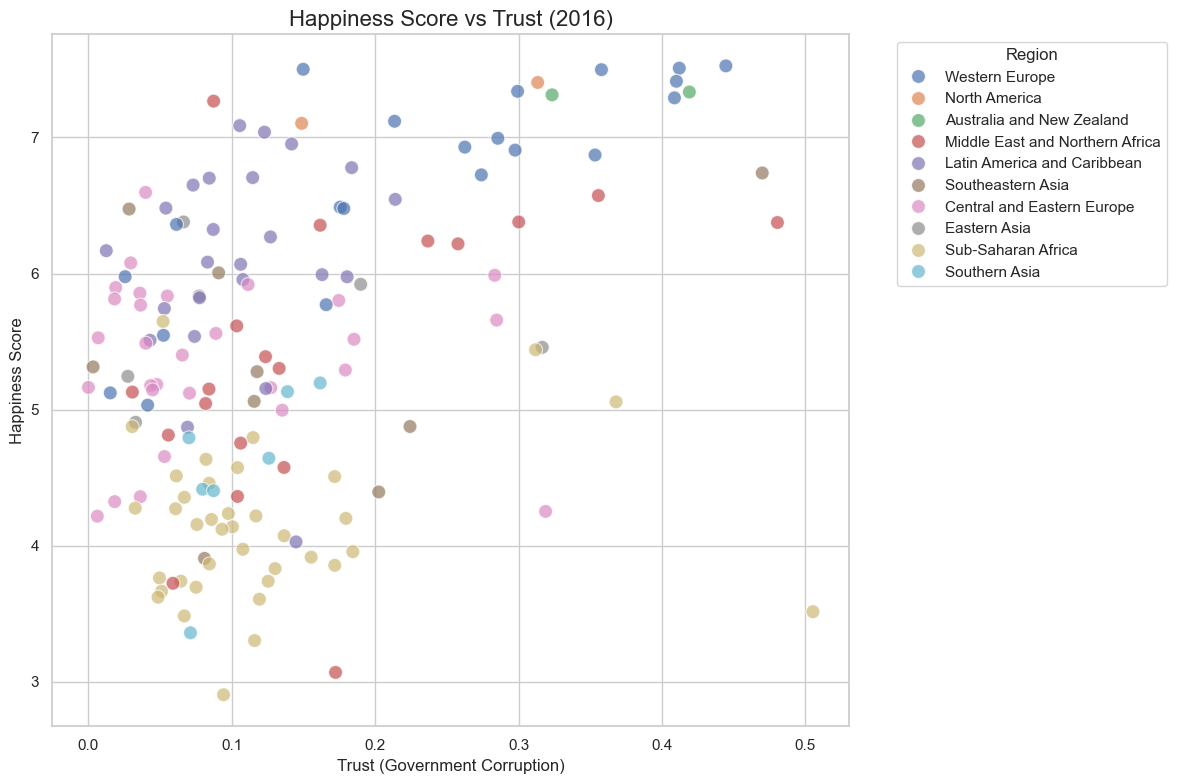

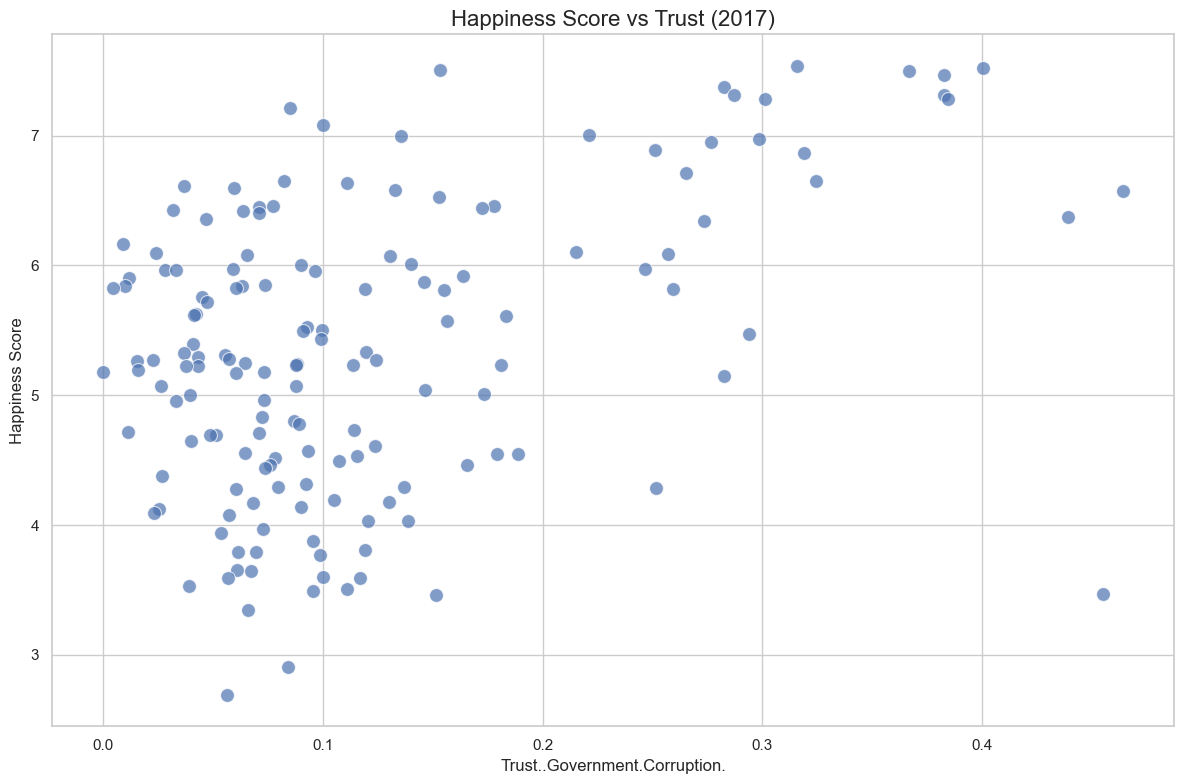

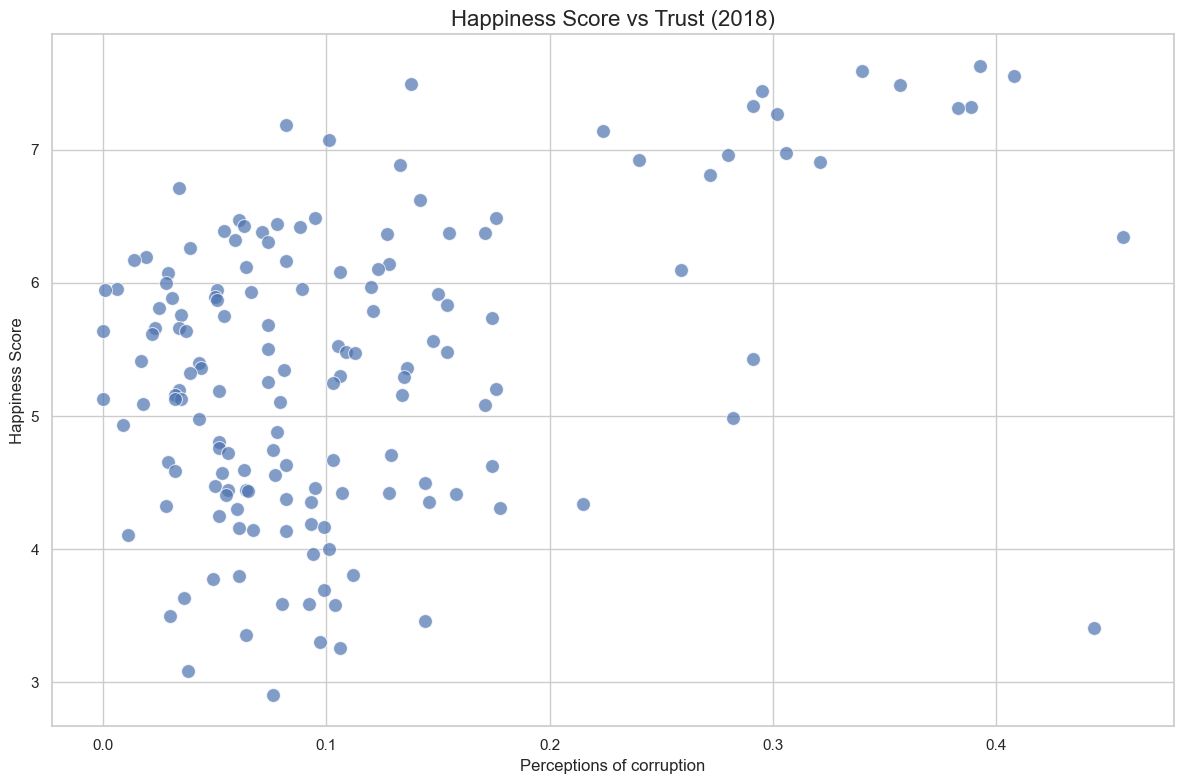

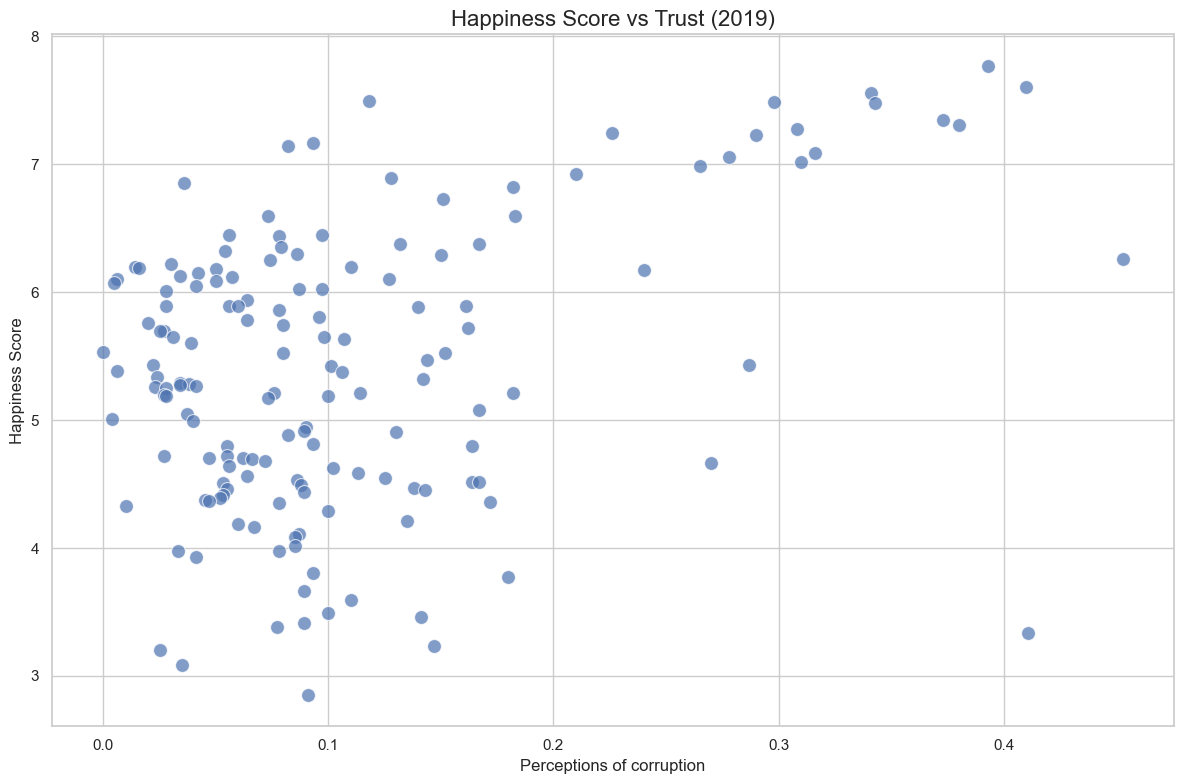

In [16]:
plot_variable_all_years("Trust")



### Generosity vs Happiness Score (2015–2019) ###



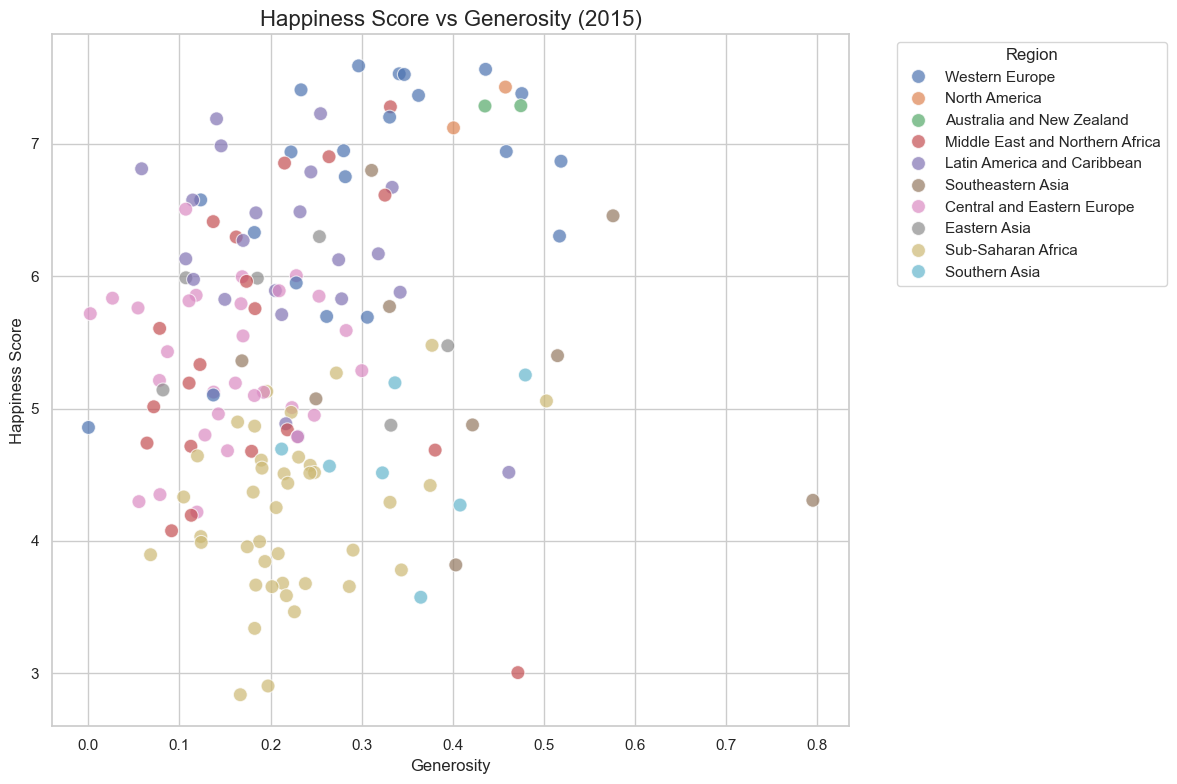

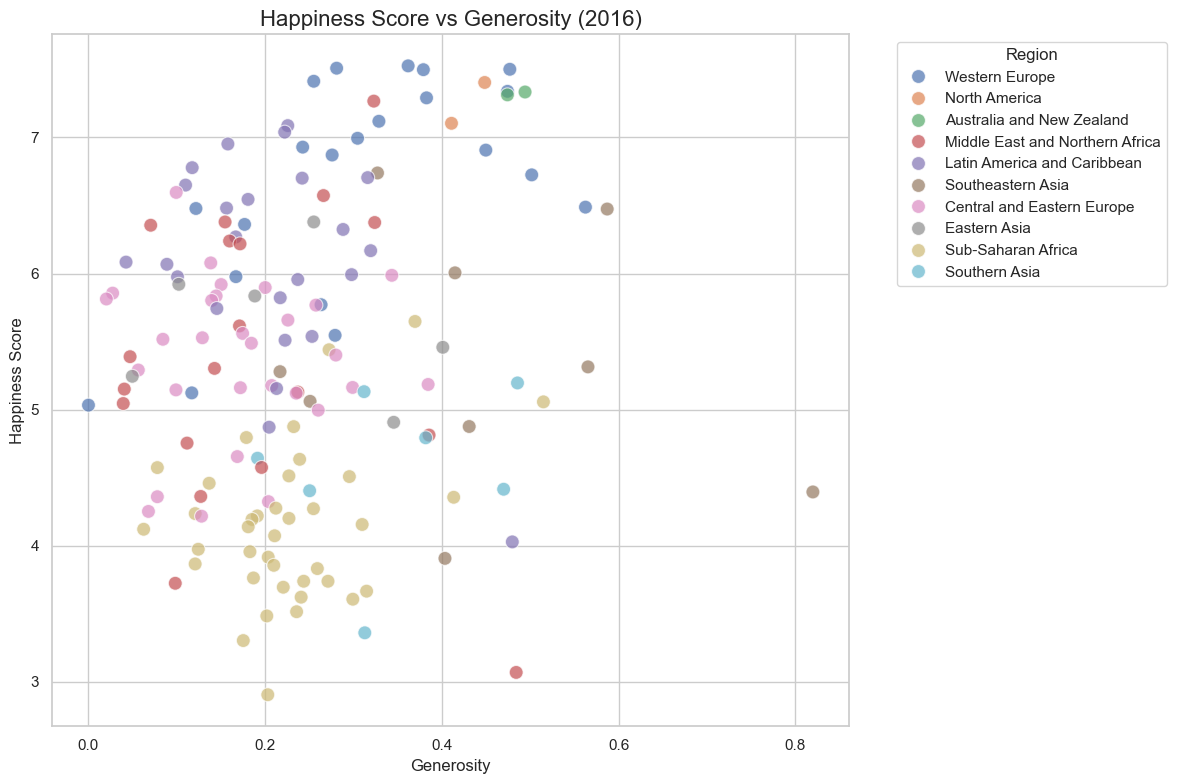

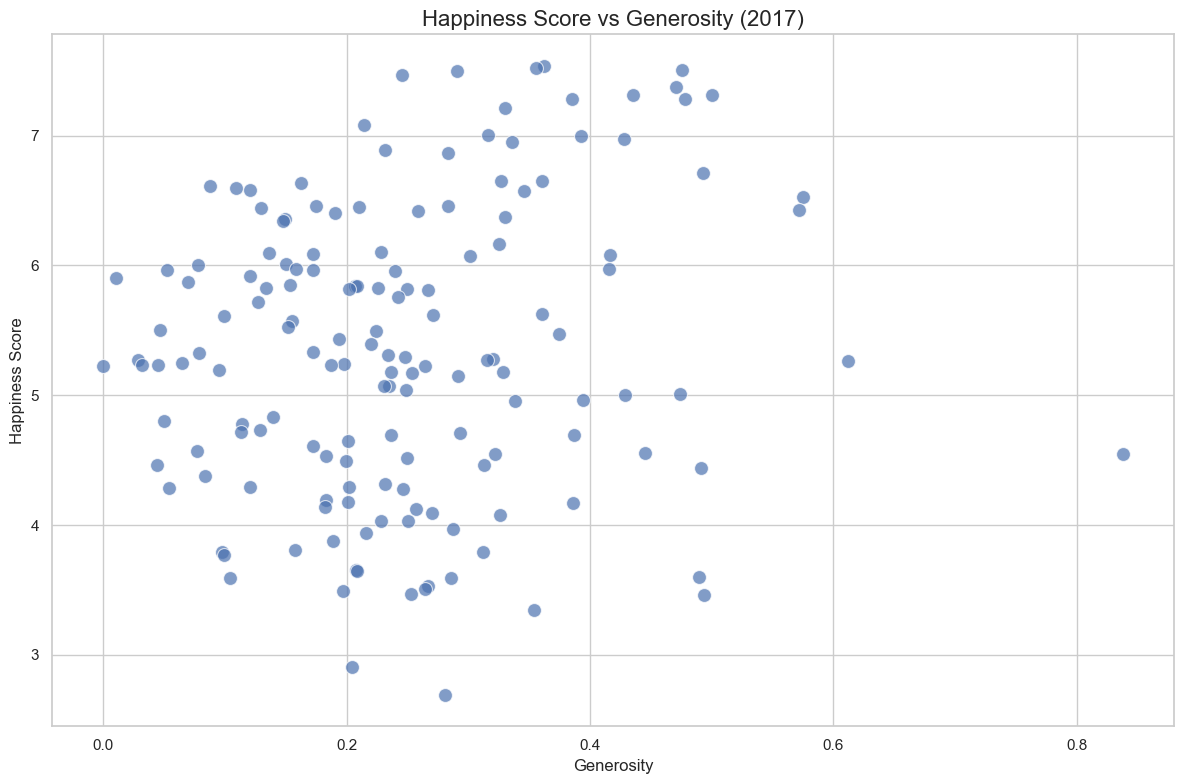

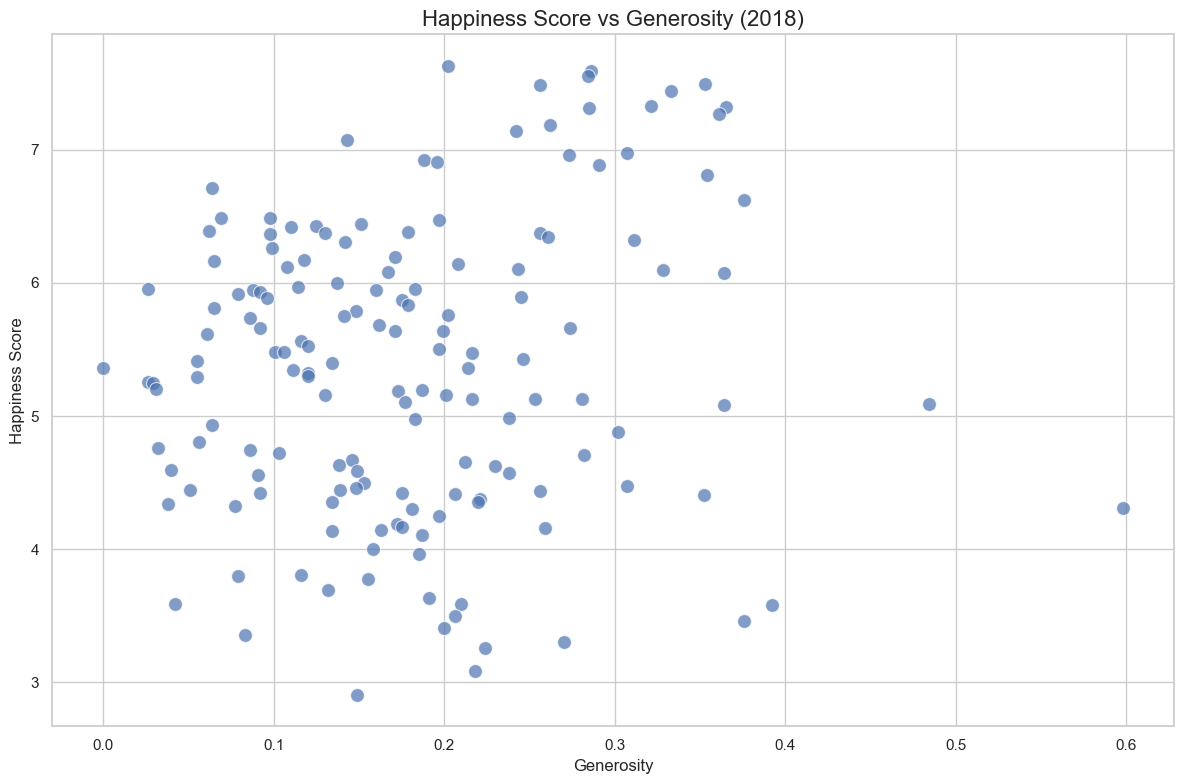

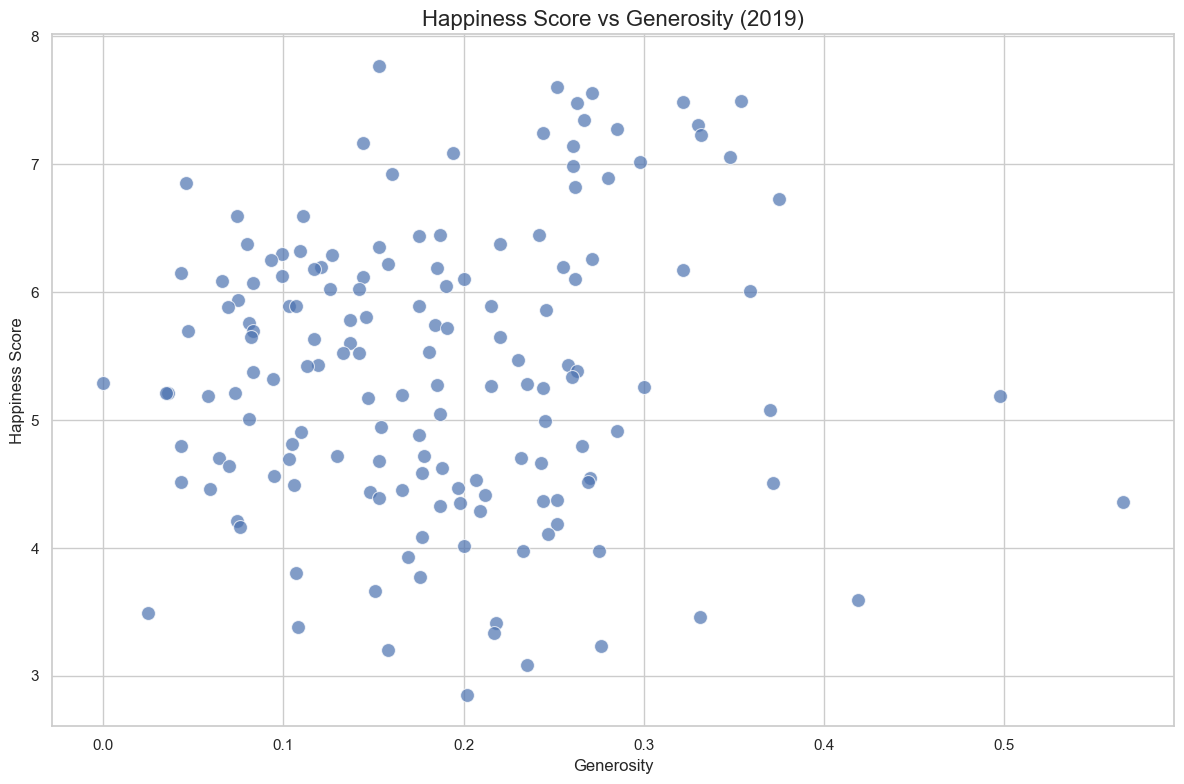

In [17]:
plot_variable_all_years("Generosity")

The single-variable analysis revealed that some factors, such as Economy and Family, exhibit a strong linear correlation with national happiness, while others, like Trust and Generosity, show weaker or more variable relationships. This gives us a simple perspective about how we can expect certain variables would affect Happiness Scores. To notice trends which are not so clear, multi-factor analysis is carried out next. The function has comments to understand what each part is doing, as it is a pretty long function and confusing what it is doing without those.

In [19]:
multi_factor_pairs = [
    ("Economy", "Family"),
    ("Freedom", "Economy"),
    ("Trust", "Economy"),
    ("Generosity", "Trust"),
    ("Family", "Generosity")
]

In [20]:
def plot_multifactor_grid(data, years, variable_pairs):
    # Set up the grid: one row per variable pair, one column per year
    n_rows = len(variable_pairs)
    n_cols = len(years)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4.5 * n_rows), squeeze=False)

    # Loop through each variable pair and year combination
    for i, (x_var, size_var) in enumerate(variable_pairs):
        for j, year in enumerate(years):
            df = data[year]  # Get the dataframe for the current year

            # Dynamically retrieve column names for this year
            x_col = column_mapping[x_var][year]
            y_col = happiness_score_col[year]
            size_col = column_mapping[size_var][year]
            hue_col = region_col[year] if region_col[year] in df.columns else None

            ax = axes[i, j]  # Access the correct subplot

            # Plot with or without hue (region coloring)
            if hue_col:
                sns.scatterplot(
                    ax=ax,
                    x=x_col,
                    y=y_col,
                    size=df[size_col],       # Marker size reflects the second variable
                    hue=df[hue_col],         # Color by region if available
                    data=df,
                    sizes=(40, 400),         # Scale marker sizes
                    alpha=0.7,
                    legend=False             # Hide legend to reduce clutter
                )
            else:
                sns.scatterplot(
                    ax=ax,
                    x=x_col,
                    y=y_col,
                    size=df[size_col],
                    data=df,
                    sizes=(40, 400),
                    alpha=0.7,
                    legend=False
                )

            # Set plot title and axis labels
            ax.set_title(f"{x_var} vs Happiness ({year})\nSize: {size_var}", fontsize=10)
            ax.set_xlabel(x_var)
            ax.set_ylabel("Happiness Score")

    # Adjust spacing to prevent label overlap
    plt.tight_layout()
    plt.show()


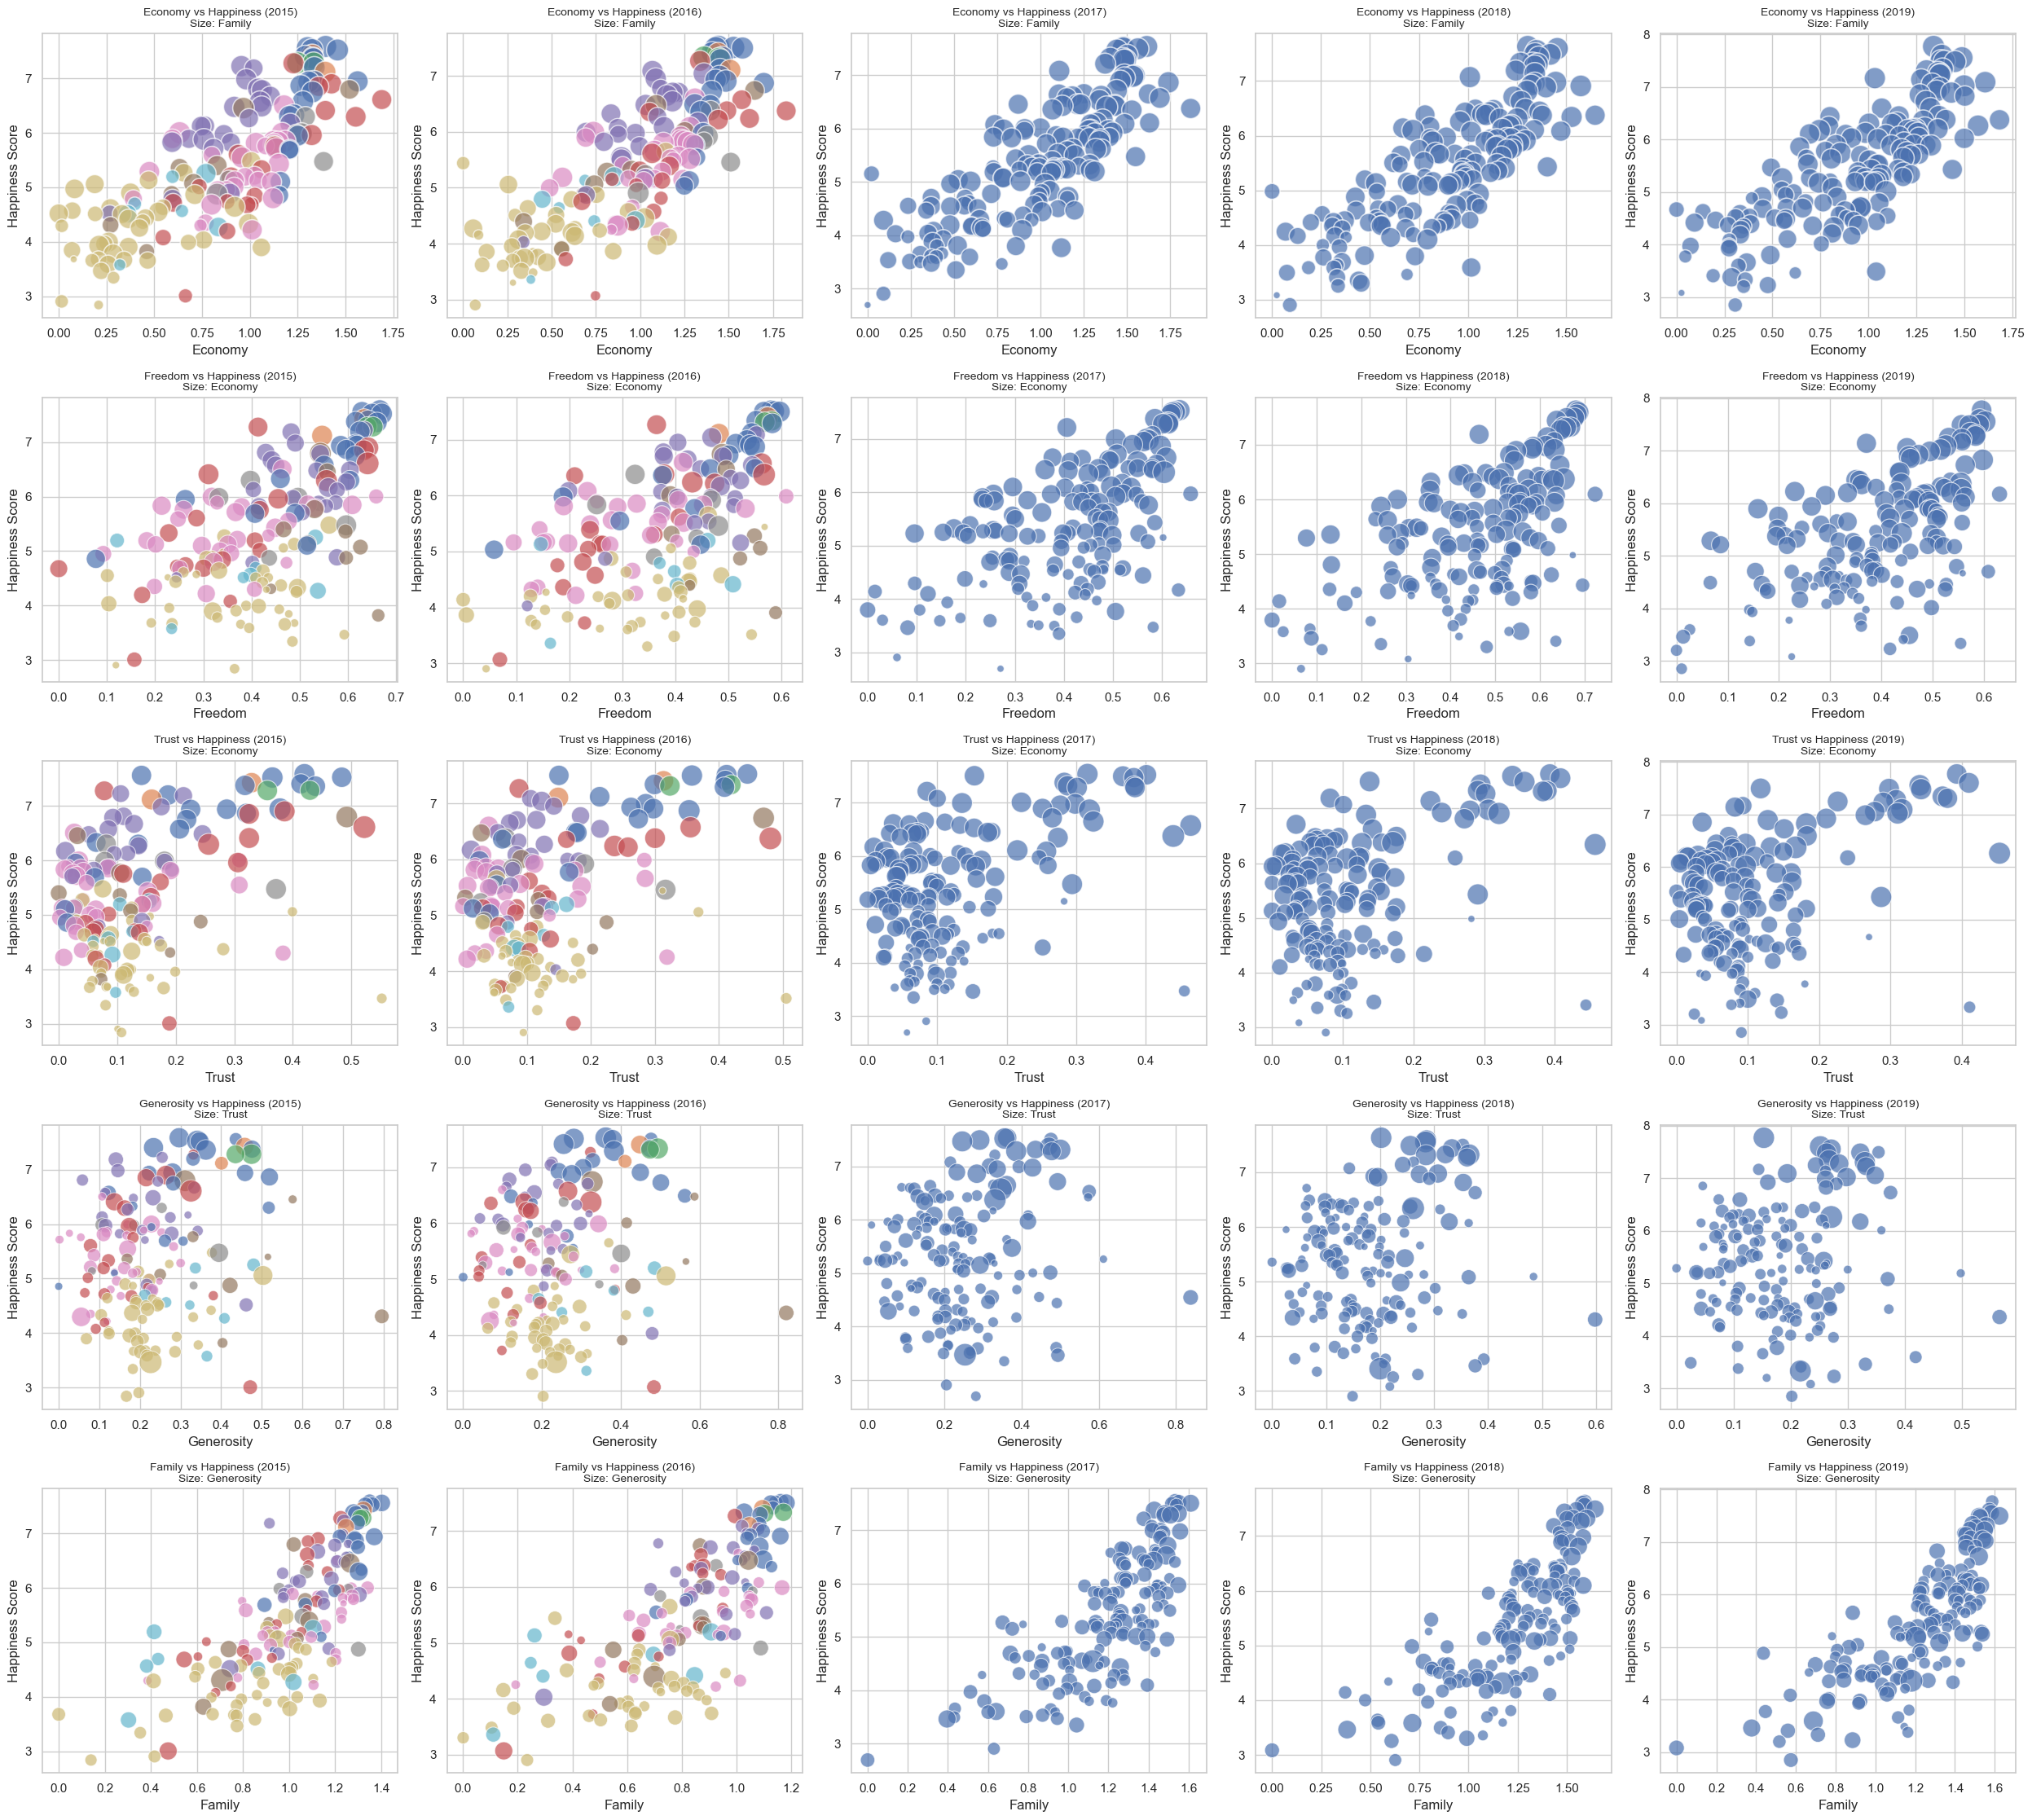

In [21]:
plot_multifactor_grid(data, years=[2015, 2016, 2017, 2018, 2019], variable_pairs=multi_factor_pairs)

To analyze how different factors influence national happiness, we conducted a multifactor visual analysis using scatter plots for five key variables—Economy, Freedom, Trust, Generosity, and Family—across the years 2015 to 2019. In each plot, the x-axis represents one primary variable, the y-axis shows the happiness score, and bubble sizes represent the influence of a second variable, adding a third dimension to the analysis. For 2015 and 2016, points are also colored by region to capture geographic differences. This approach allows for pattern recognition not only in direct relationships between happiness and individual factors, but also in how those relationships are influenced by other variables. For example, economic strength consistently correlates with higher happiness, and the effect is more pronounced when paired with strong social support or freedom. The use of visual encoding (size and color) helps uncover interactions that single-variable analysis might miss.

In [23]:

variables = ["Economy", "Family", "Freedom", "Trust", "Generosity"]

rename_mapping = {
    2015: {
        "Economy (GDP per Capita)": "Economy",
        "Family": "Family",
        "Freedom": "Freedom",
        "Trust (Government Corruption)": "Trust",
        "Generosity": "Generosity",
        "Happiness Score": "Happiness"
    },
    2016: {
        "Economy (GDP per Capita)": "Economy",
        "Family": "Family",
        "Freedom": "Freedom",
        "Trust (Government Corruption)": "Trust",
        "Generosity": "Generosity",
        "Happiness Score": "Happiness"
    },
    2017: {
        "Economy..GDP.per.Capita.": "Economy",
        "Family": "Family",
        "Freedom": "Freedom",
        "Trust..Government.Corruption.": "Trust",
        "Generosity": "Generosity",
        "Happiness.Score": "Happiness"
    },
    2018: {
        "GDP per capita": "Economy",
        "Social support": "Family",
        "Freedom to make life choices": "Freedom",
        "Perceptions of corruption": "Trust",
        "Generosity": "Generosity",
        "Score": "Happiness"
    },
    2019: {
        "GDP per capita": "Economy",
        "Social support": "Family",
        "Freedom to make life choices": "Freedom",
        "Perceptions of corruption": "Trust",
        "Generosity": "Generosity",
        "Score": "Happiness"
    }
}


corr_results = {var: [] for var in variables}

for year in range(2015, 2020):
    df = data[year].rename(columns=rename_mapping[year])
    
    for var in variables:
        correlation = df[[var, "Happiness"]].corr().iloc[0, 1]
        corr_results[var].append(round(correlation, 3))


This section of code calculates the Pearson correlation coefficient between each of the five selected variables (Economy, Family, Freedom, Trust, and Generosity) and the happiness score across the years 2015 to 2019. Since the column names vary by year in the original dataset, a mapping dictionary is used to standardise column names to a consistent format. For each year, the dataset is renamed accordingly, and the correlation between each variable and the standardised Happiness column is computed. These correlation values are stored in a dictionary, which is later used to analyse how the strength of association between each variable and happiness changes over time.


$ \textbf{Results} $

To assess how different factors contribute to national happiness, we first performed a single-variable analysis using scatter plots with fitted regression lines. These plots revealed that variables such as Economy and Family showed strong positive correlations with happiness, while variables like Generosity and Trust had weaker or more variable associations.

To deepen our understanding, we conducted a multi-factor analysis by plotting scatter plots with bubble sizes representing a second variable. This allowed us to visualise interaction effects between pairs of variables, such as how high GDP combined with strong Social Support aligns with higher happiness scores. Due to data limitations, only the 2015 and 2016 datasets included regional labels, which we used to colour points by region in those years.

Next, we plotted scatter graphs with regression lines and displayed correlation values to deepen our understanding and extract quantitative insights. A custom function was used to automate the process for each year and variable, ensuring consistency, simplicity, and efficiency in generating the visuals.



In [26]:
def plot_variable_with_regression(df, year, x_var_key):
    x_col = column_mapping[x_var_key][year]
    y_col = happiness_score_col[year]
    hue_col = region_col[year]

    # Compute Pearson correlation between the selected variable and happiness
    corr, _ = pearsonr(df[x_col], df[y_col])
    corr_text = f"Correlation: {corr:.2f}"  # Format for display

    plt.figure(figsize=(12, 8))

    if hue_col and hue_col in df.columns:
        sns.scatterplot(x=x_col, y=y_col, data=df, hue=df[hue_col], s=100, alpha=0.7)
        plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside plot
    else:
        sns.scatterplot(x=x_col, y=y_col, data=df, s=100, alpha=0.7)

    # Add linear regression line without scatter points
    sns.regplot(x=x_col, y=y_col, data=df, scatter=False, line_kws={'color': 'red'})

    # Display correlation in top-left corner of plot
    plt.annotate(corr_text, xy=(0.05, 0.95), xycoords="axes fraction", fontsize=12, color="red")

    plt.title(f'Happiness Score vs {x_var_key} ({year})', fontsize=16)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel("Happiness Score", fontsize=12)

    plt.tight_layout()
    plt.show()


Plotting Economy for 2015


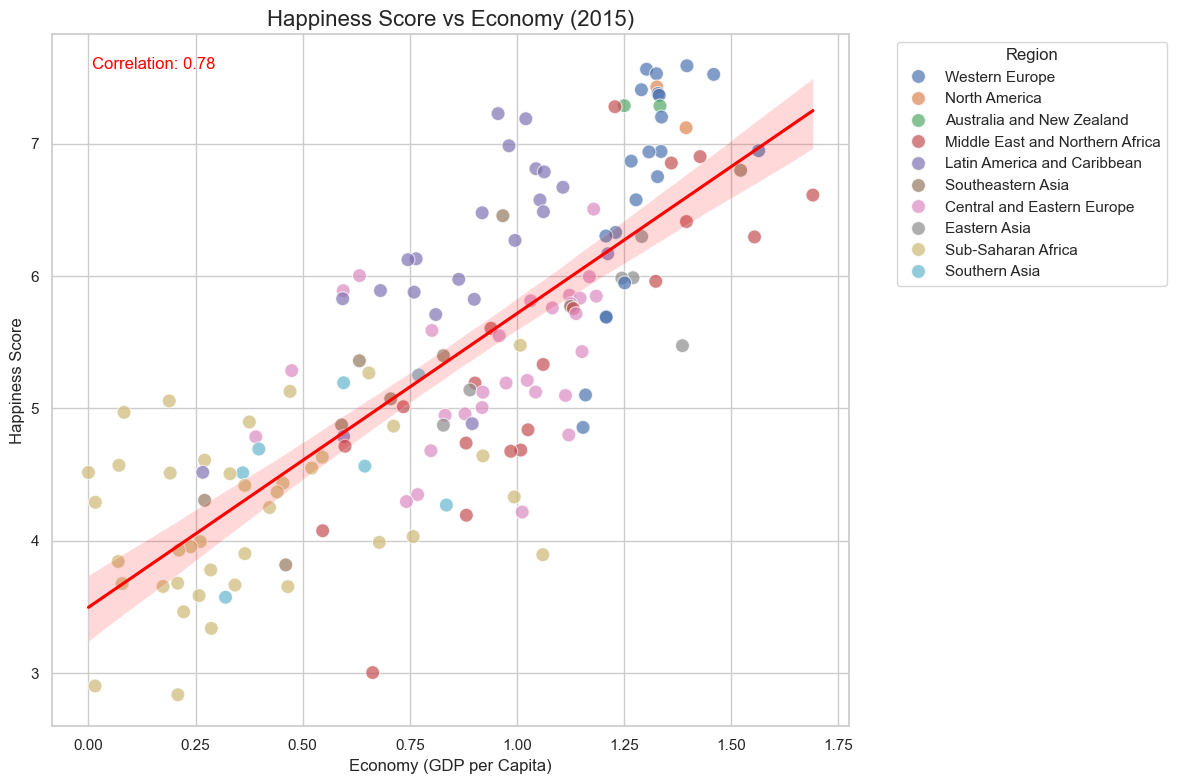

Plotting Economy for 2016


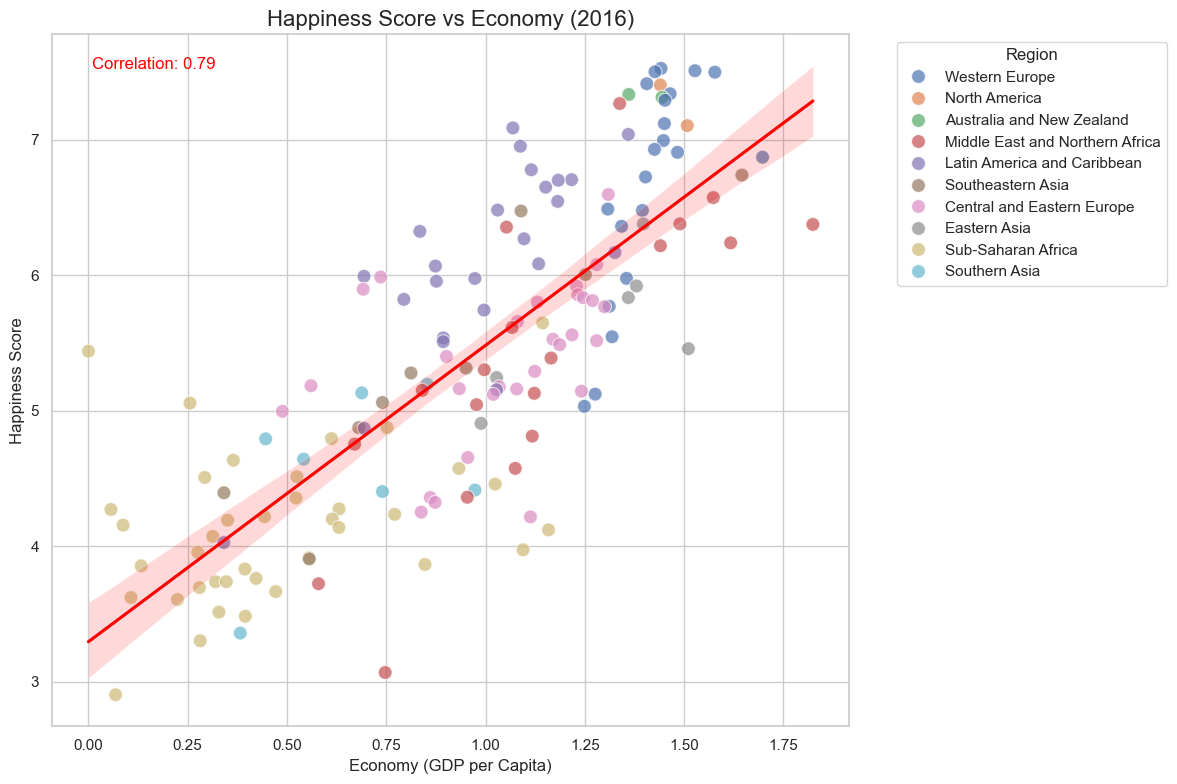

Plotting Economy for 2017


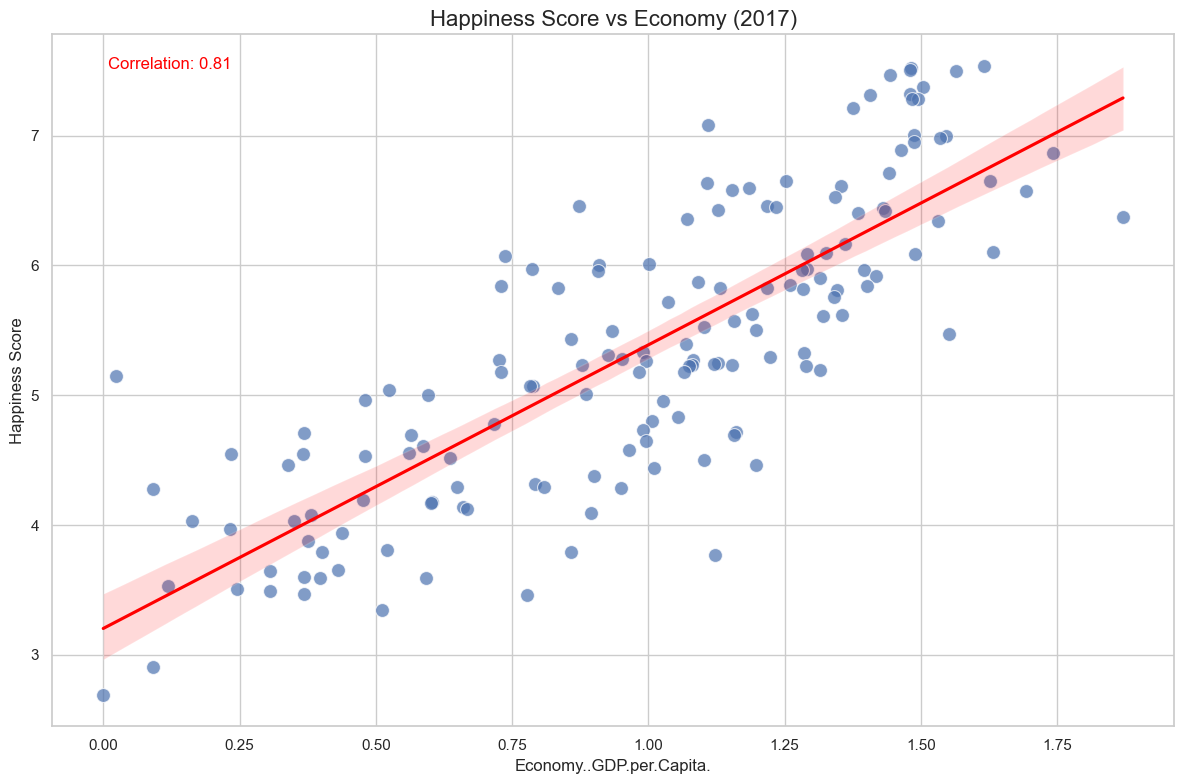

Plotting Economy for 2018


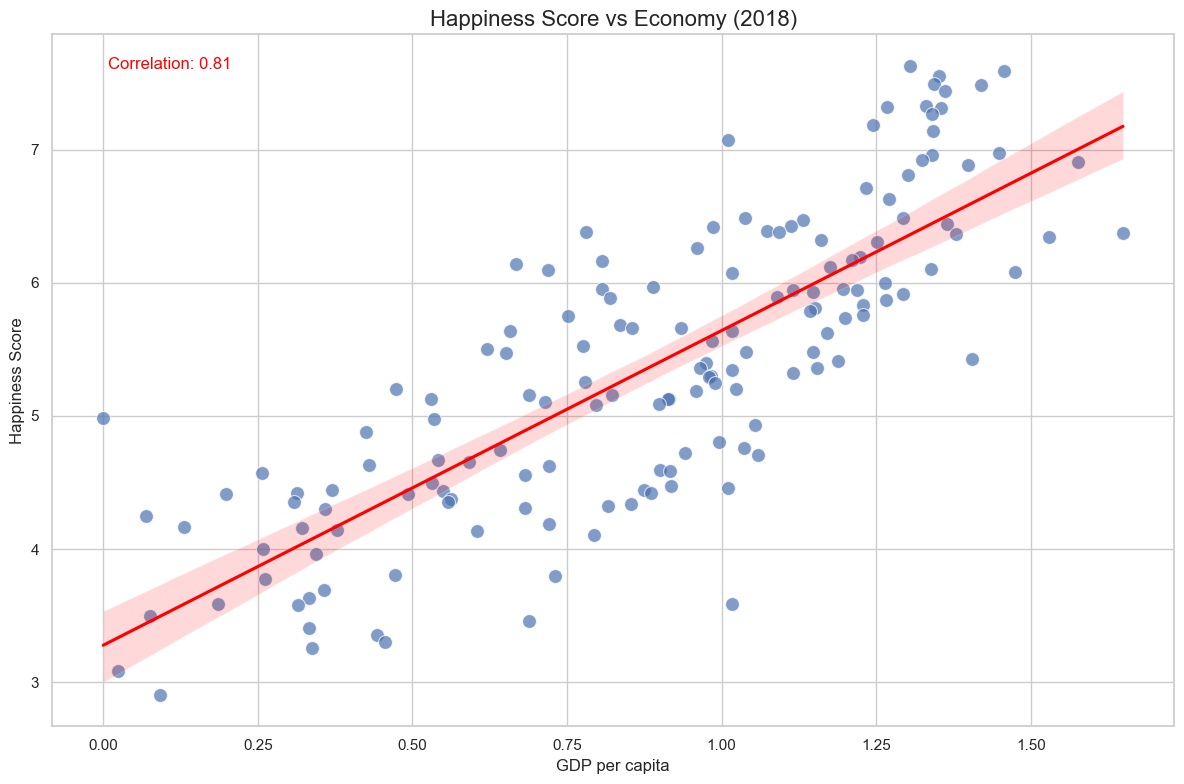

Plotting Economy for 2019


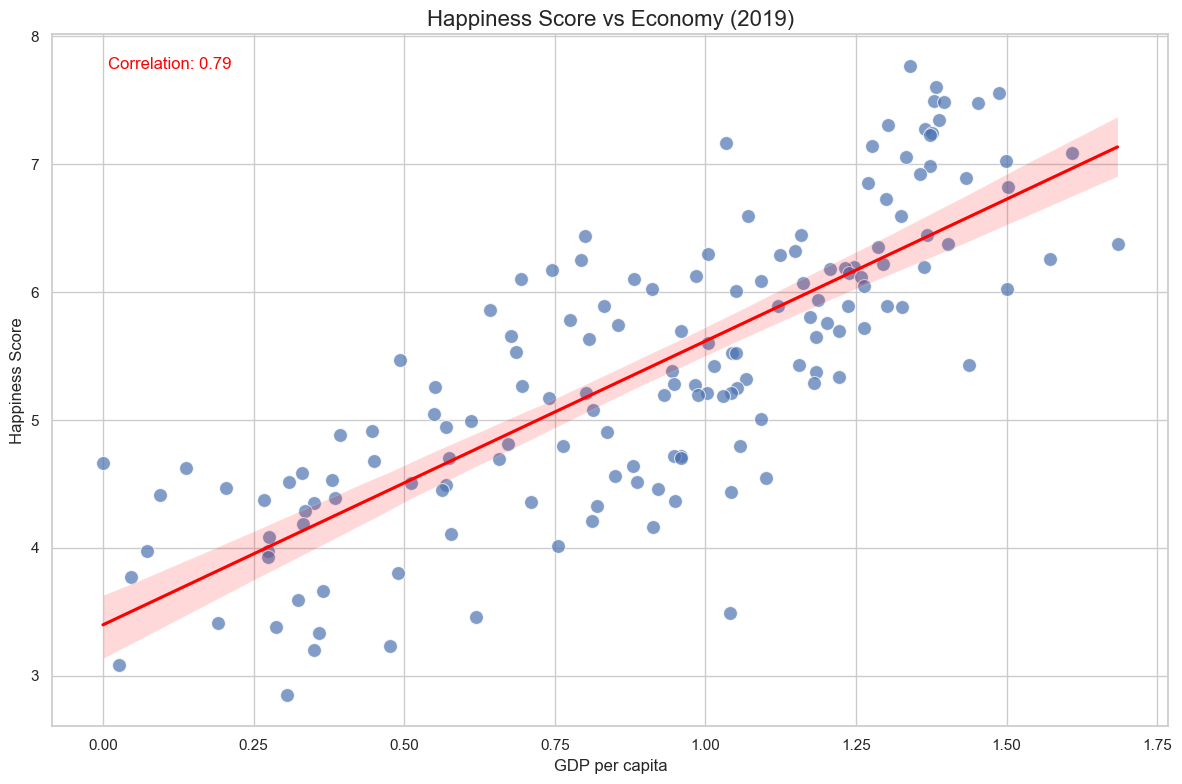

Plotting Family for 2015


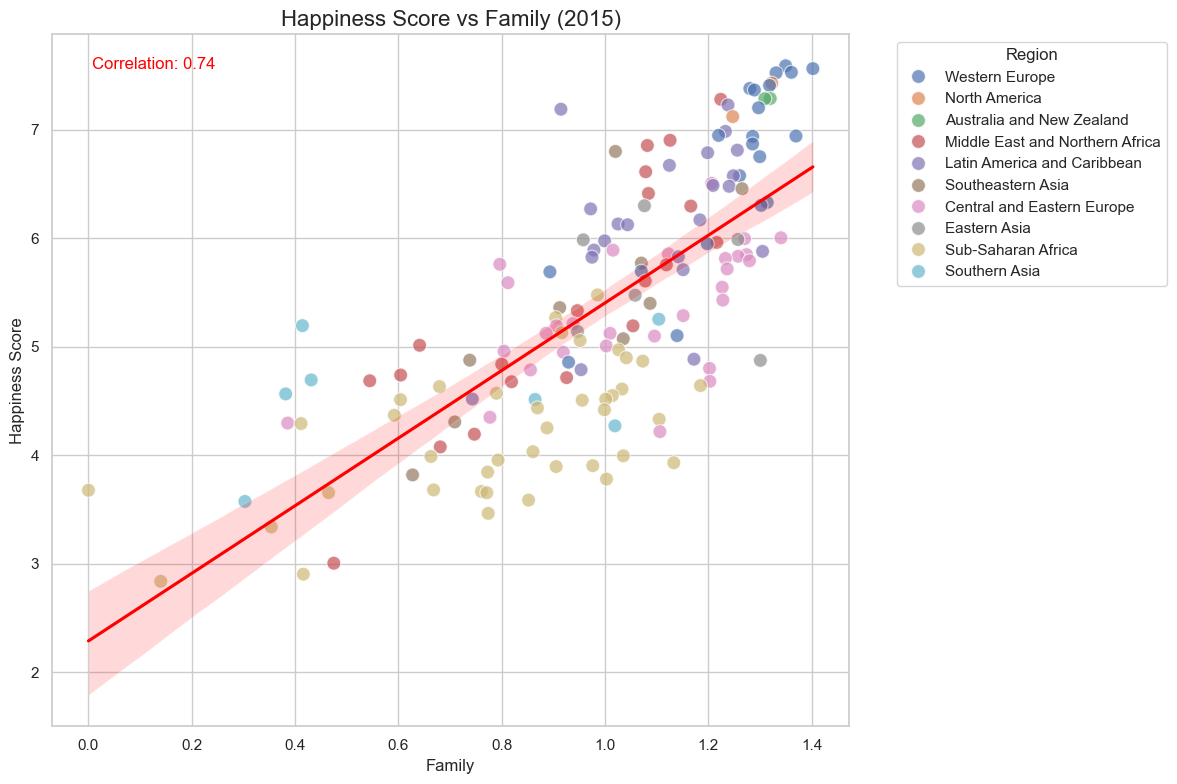

Plotting Family for 2016


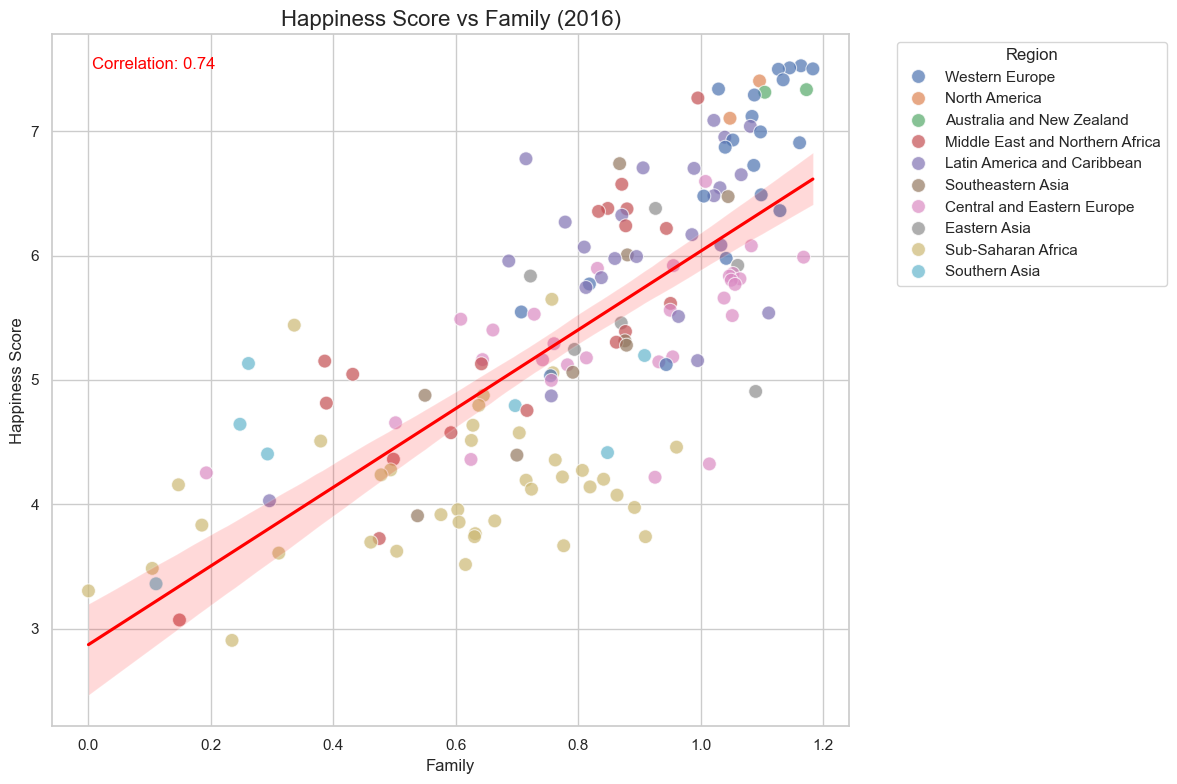

Plotting Family for 2017


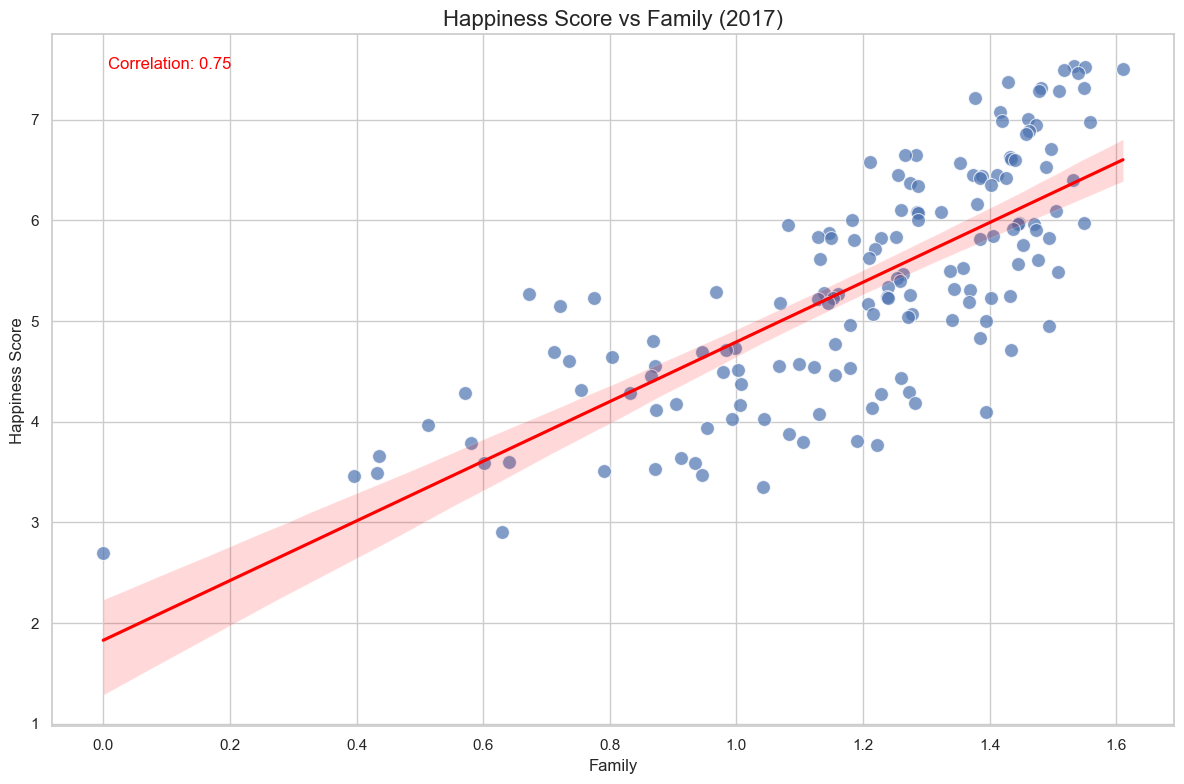

Plotting Family for 2018


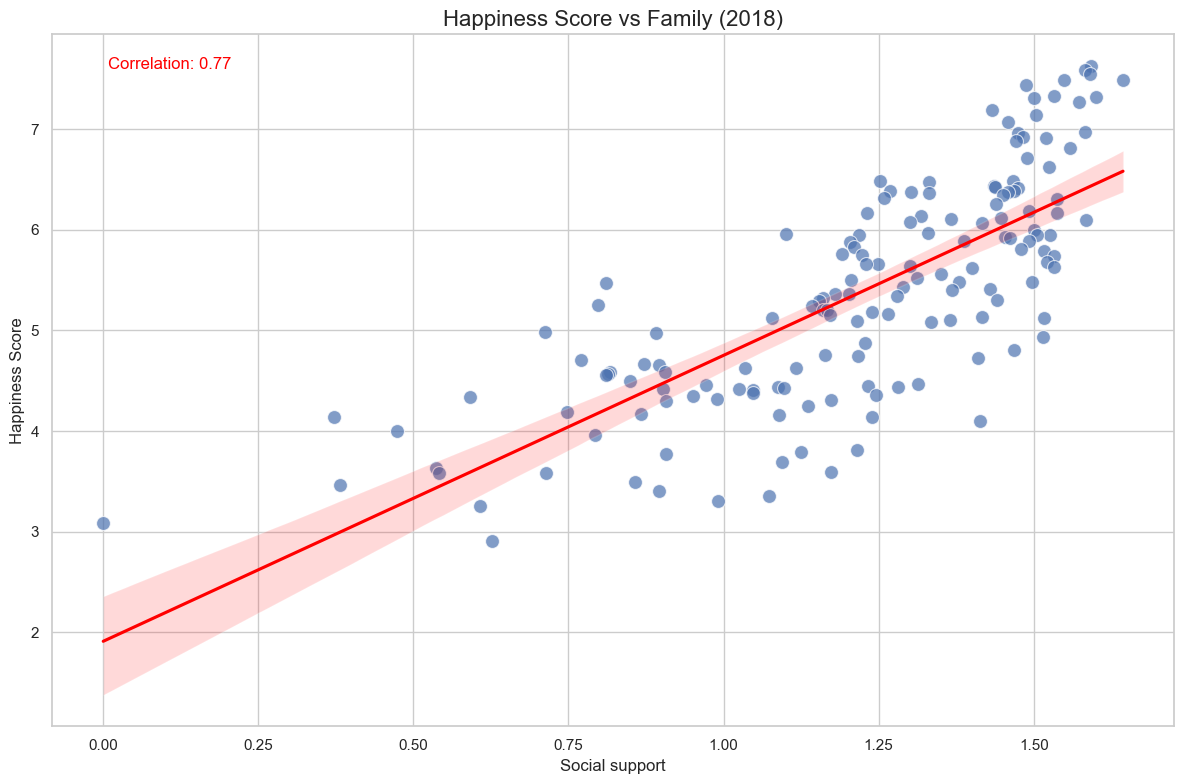

Plotting Family for 2019


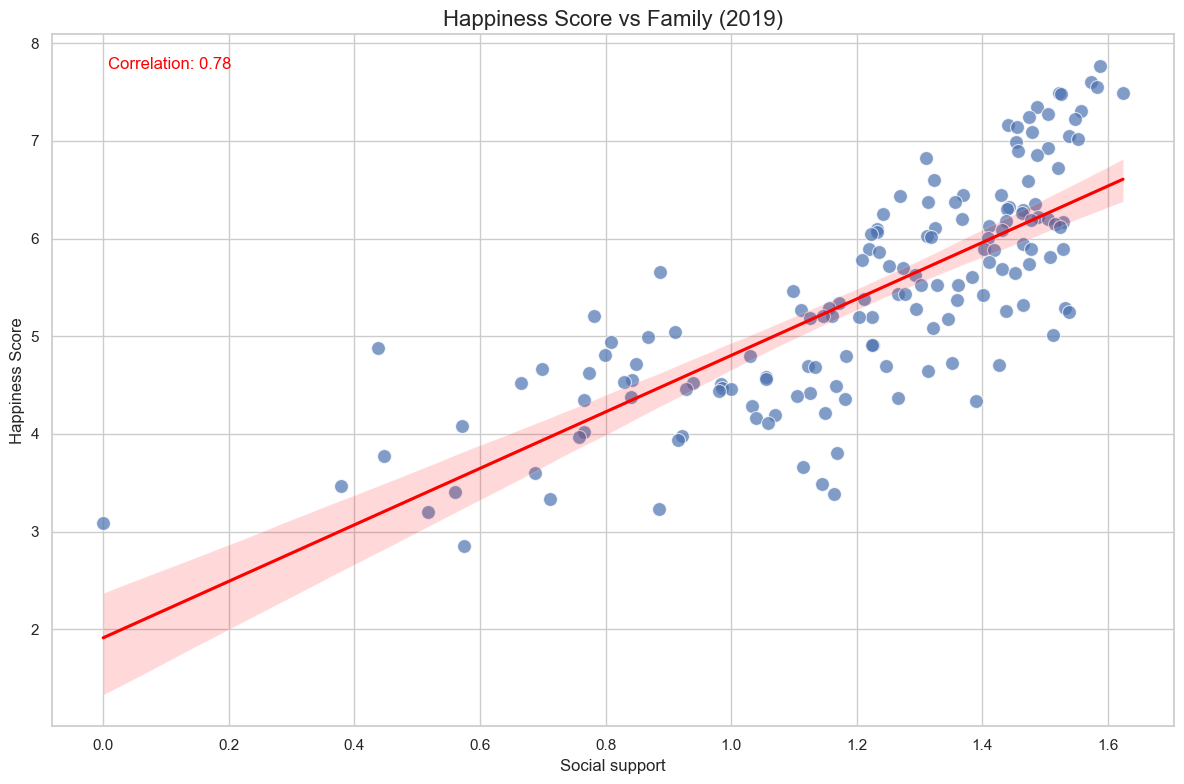

Plotting Freedom for 2015


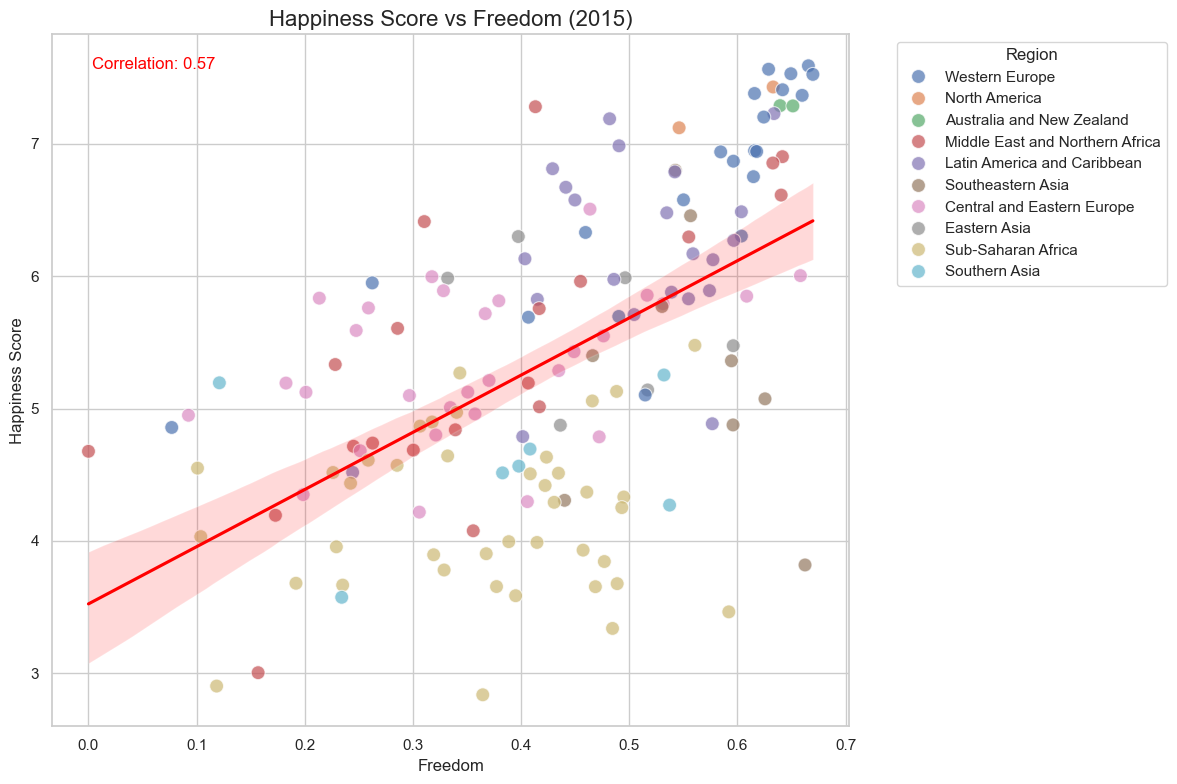

Plotting Freedom for 2016


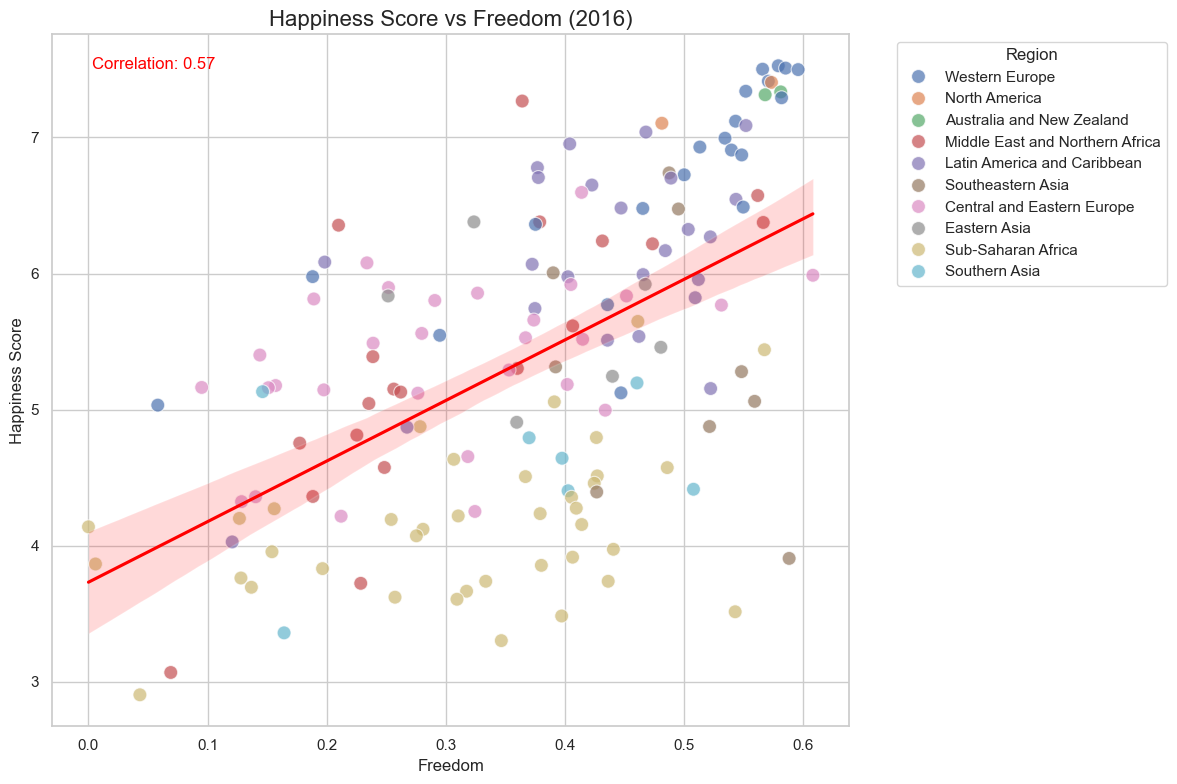

Plotting Freedom for 2017


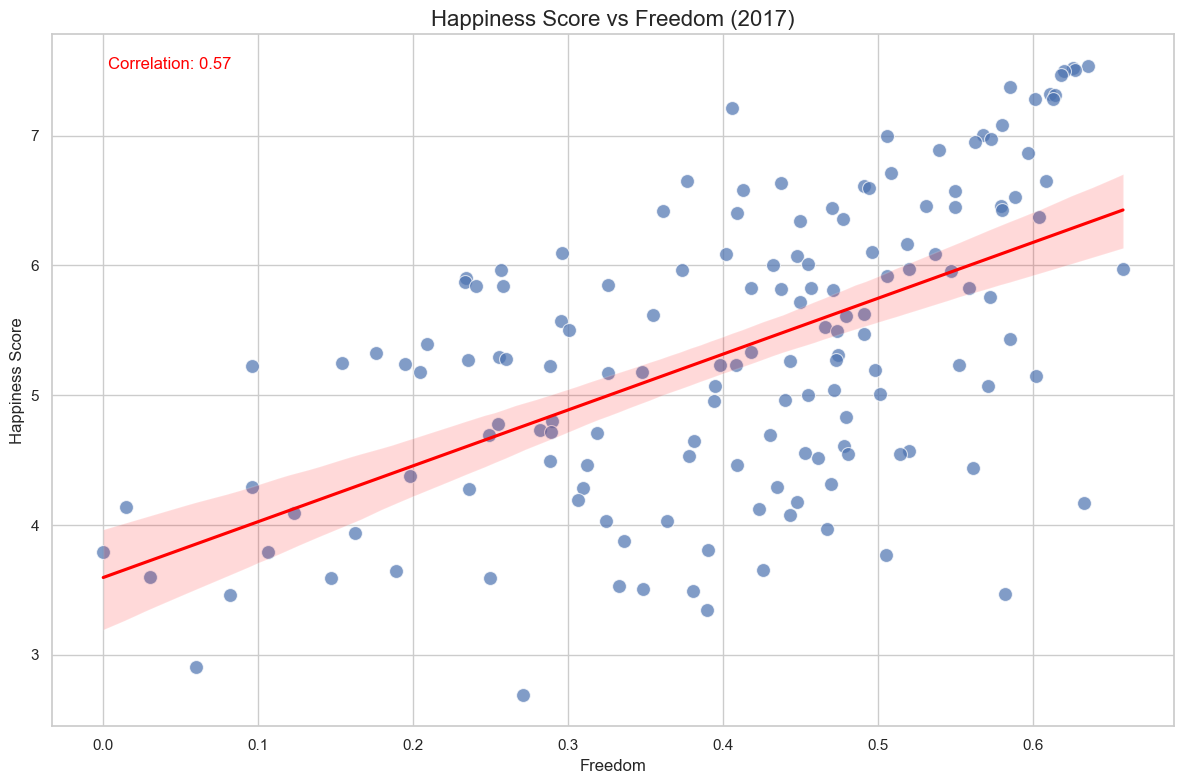

Plotting Freedom for 2018


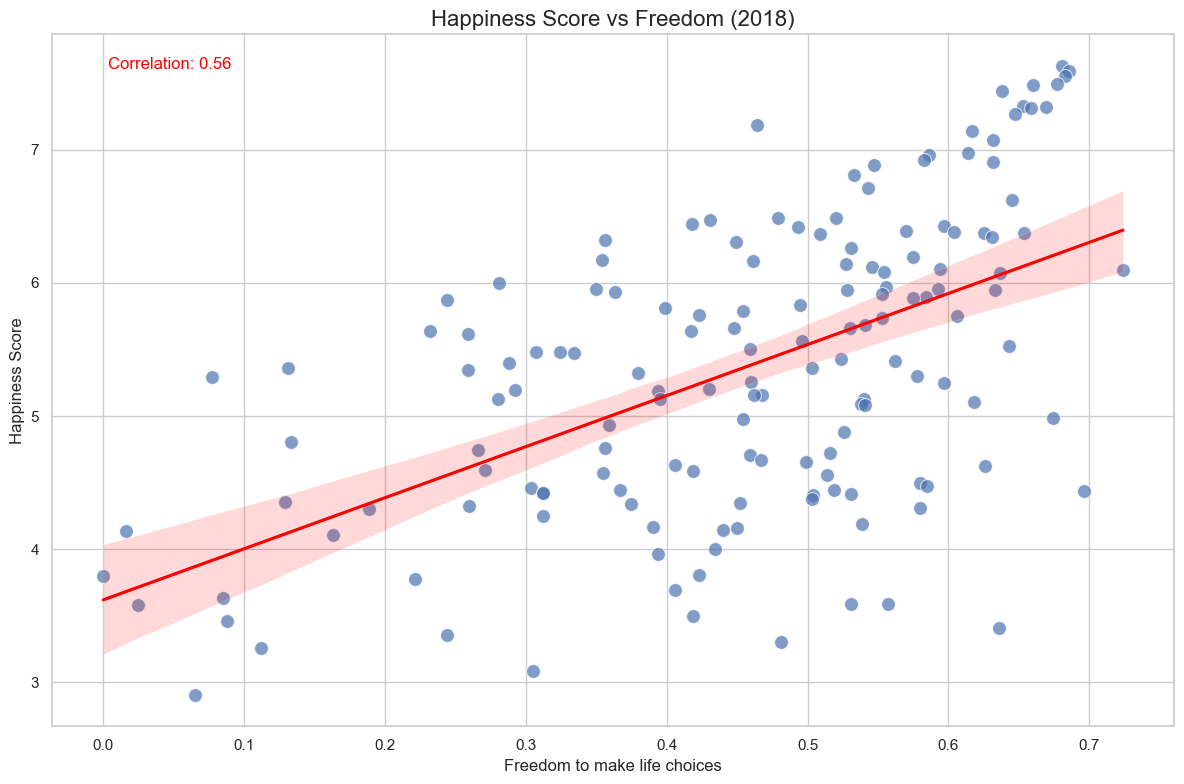

Plotting Freedom for 2019


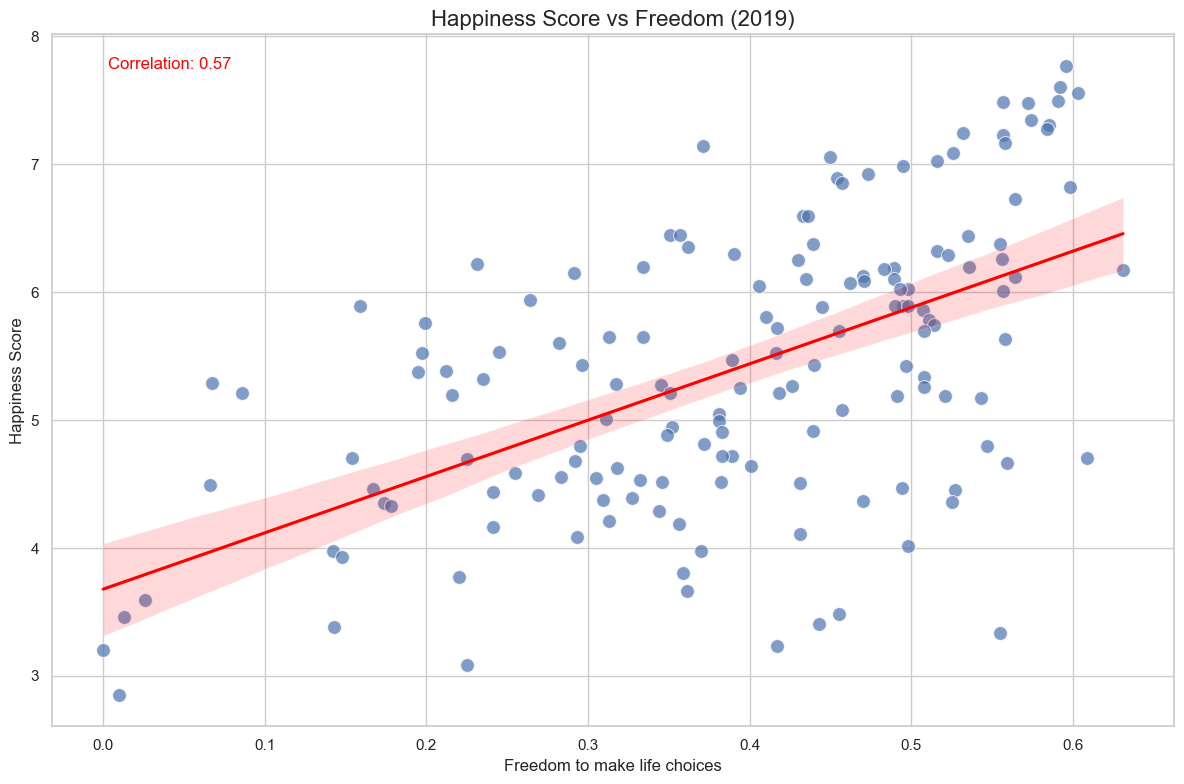

Plotting Trust for 2015


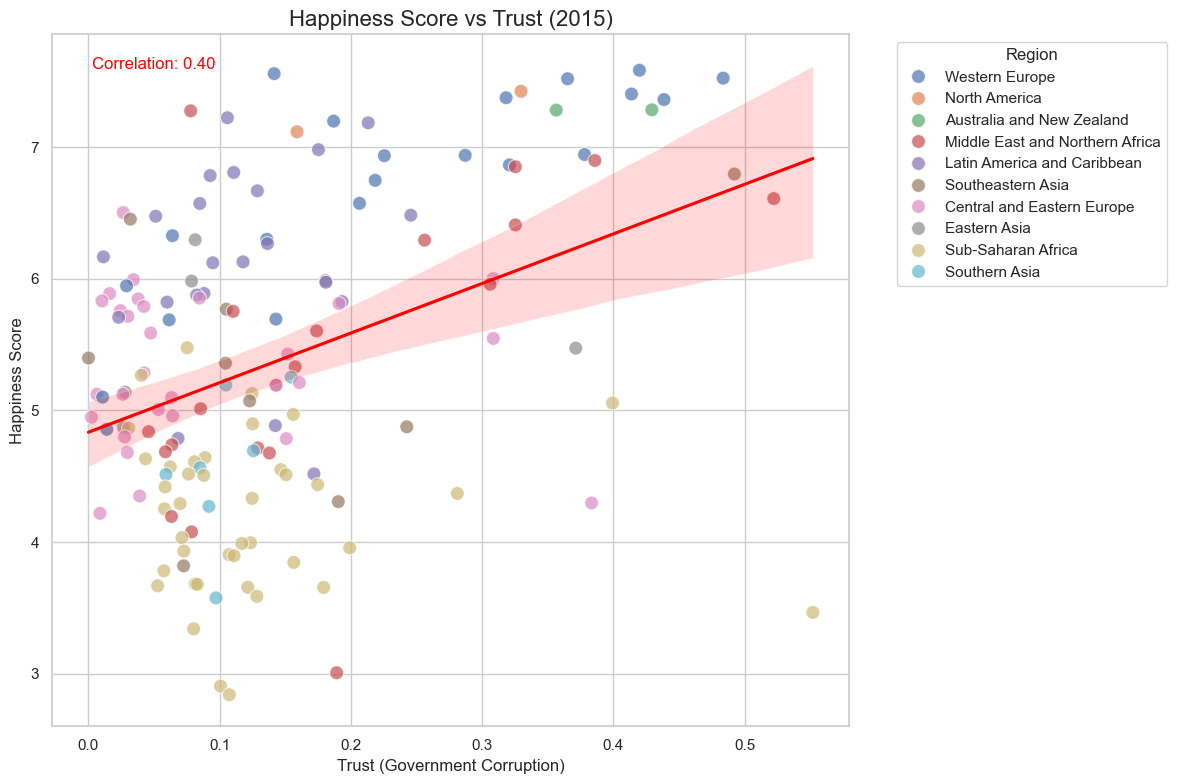

Plotting Trust for 2016


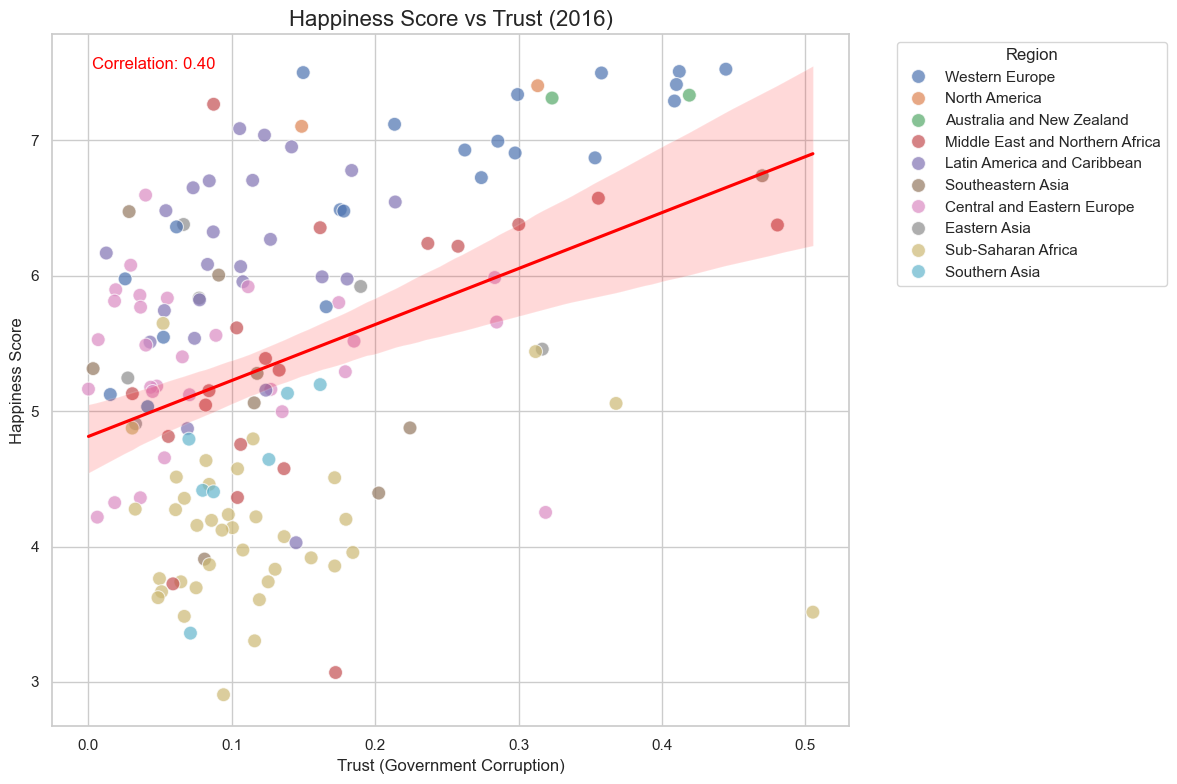

Plotting Trust for 2017


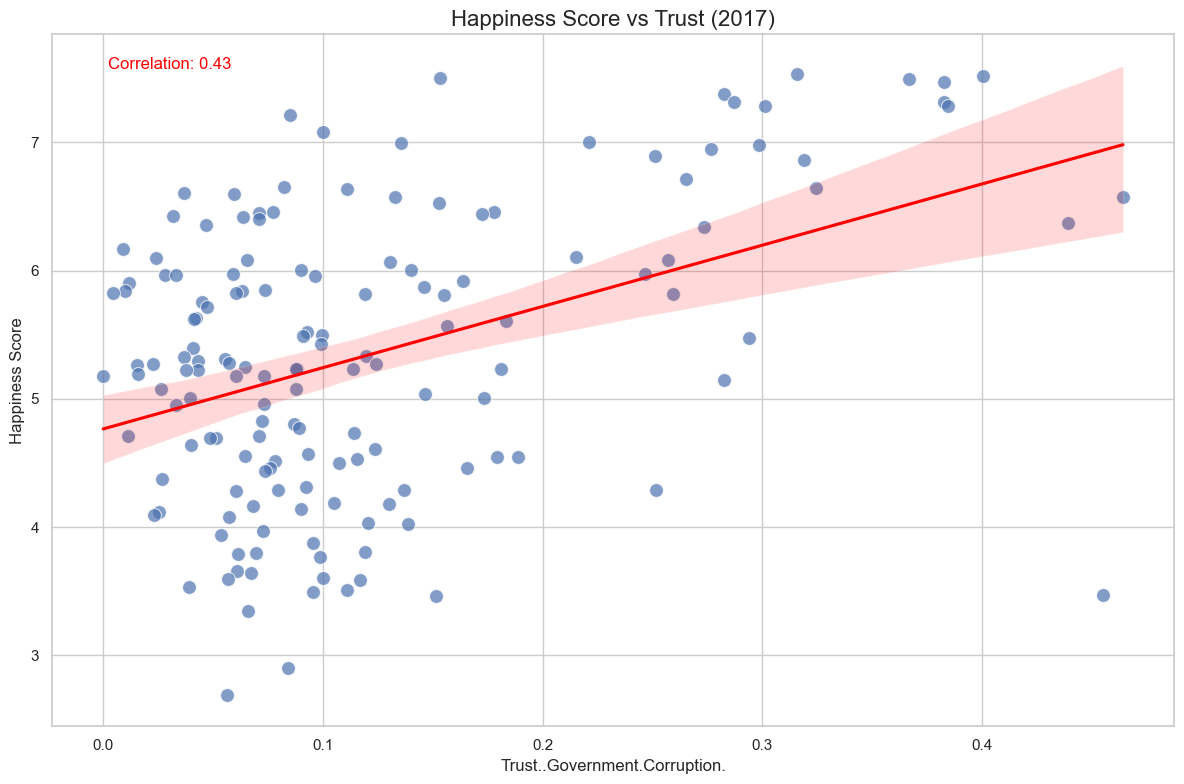

Plotting Trust for 2018


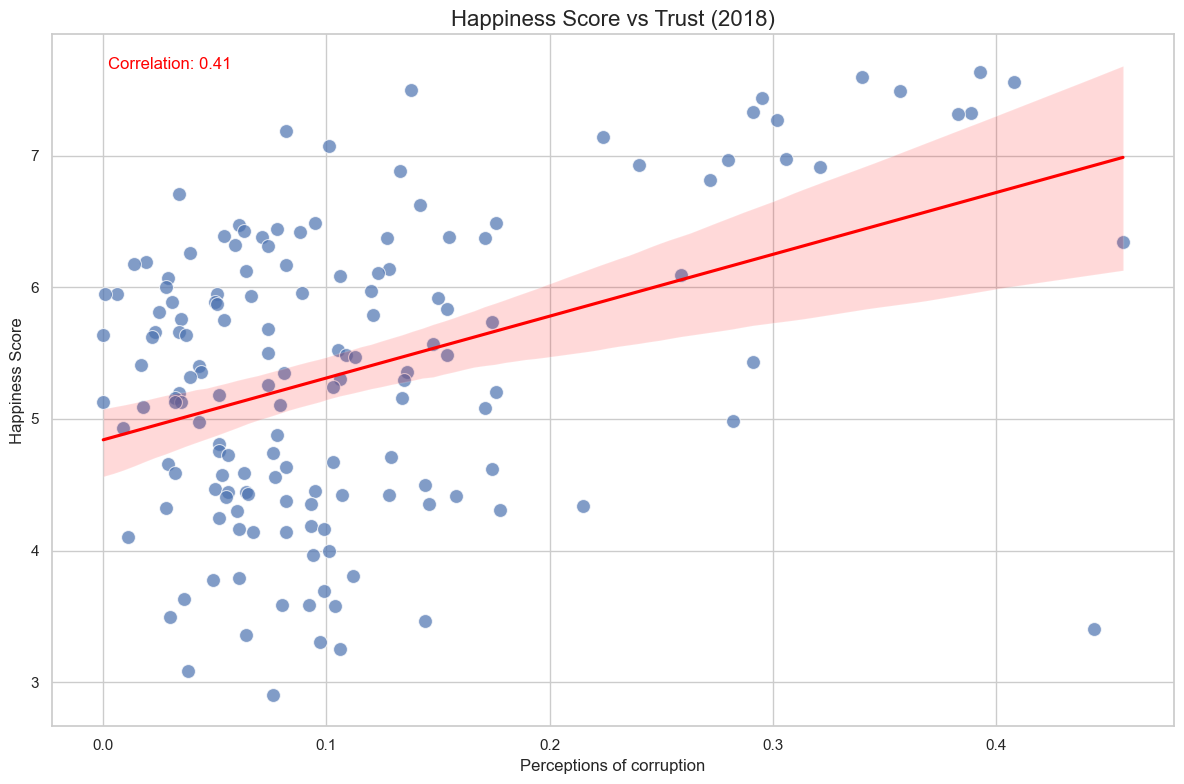

Plotting Trust for 2019


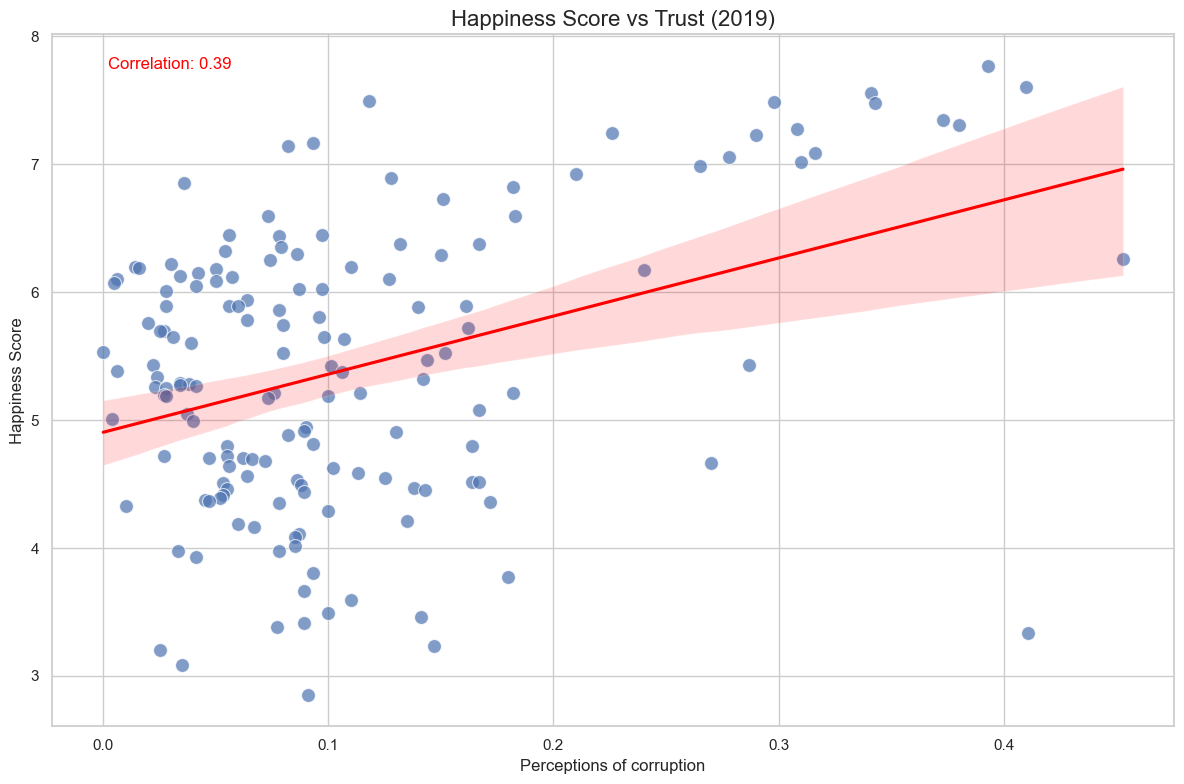

Plotting Generosity for 2015


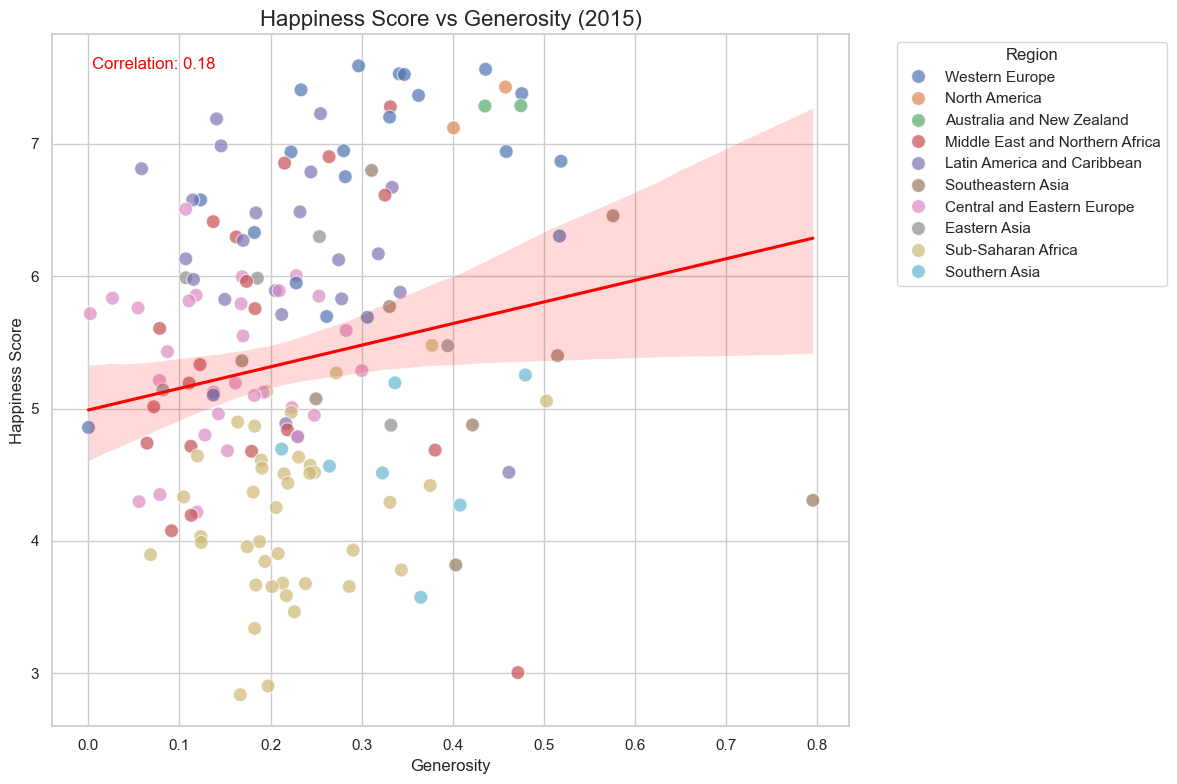

Plotting Generosity for 2016


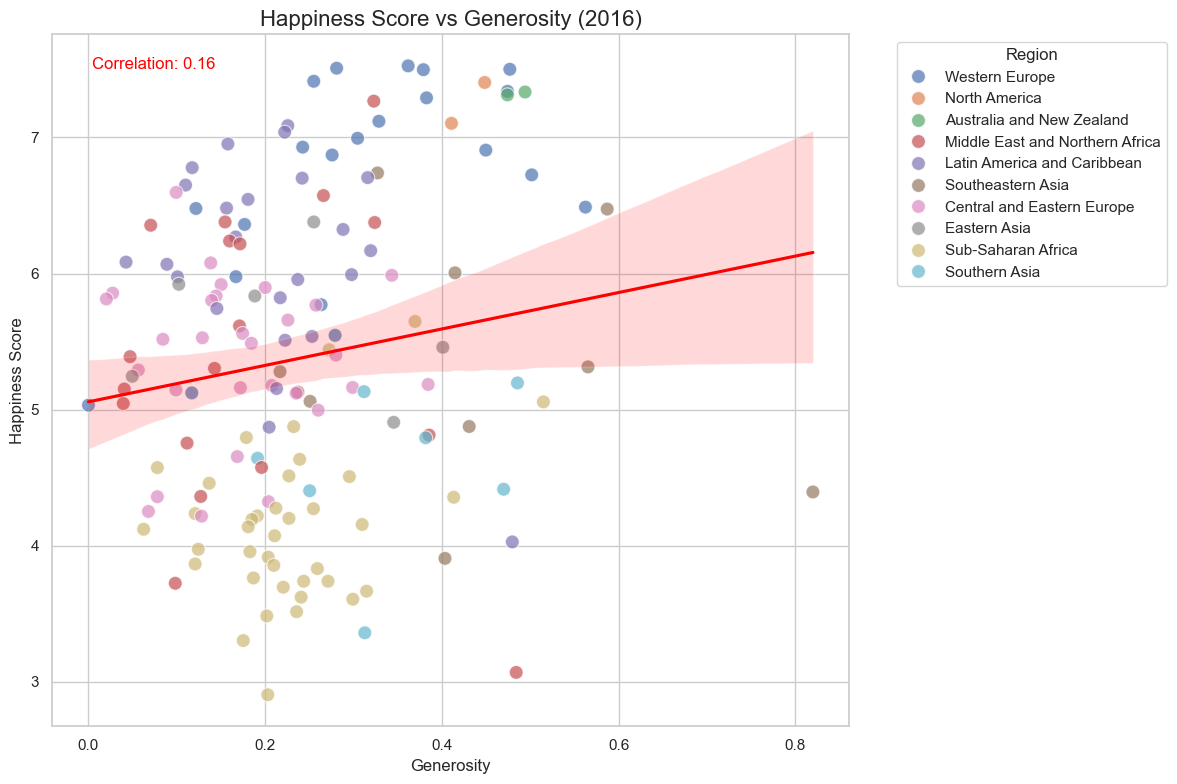

Plotting Generosity for 2017


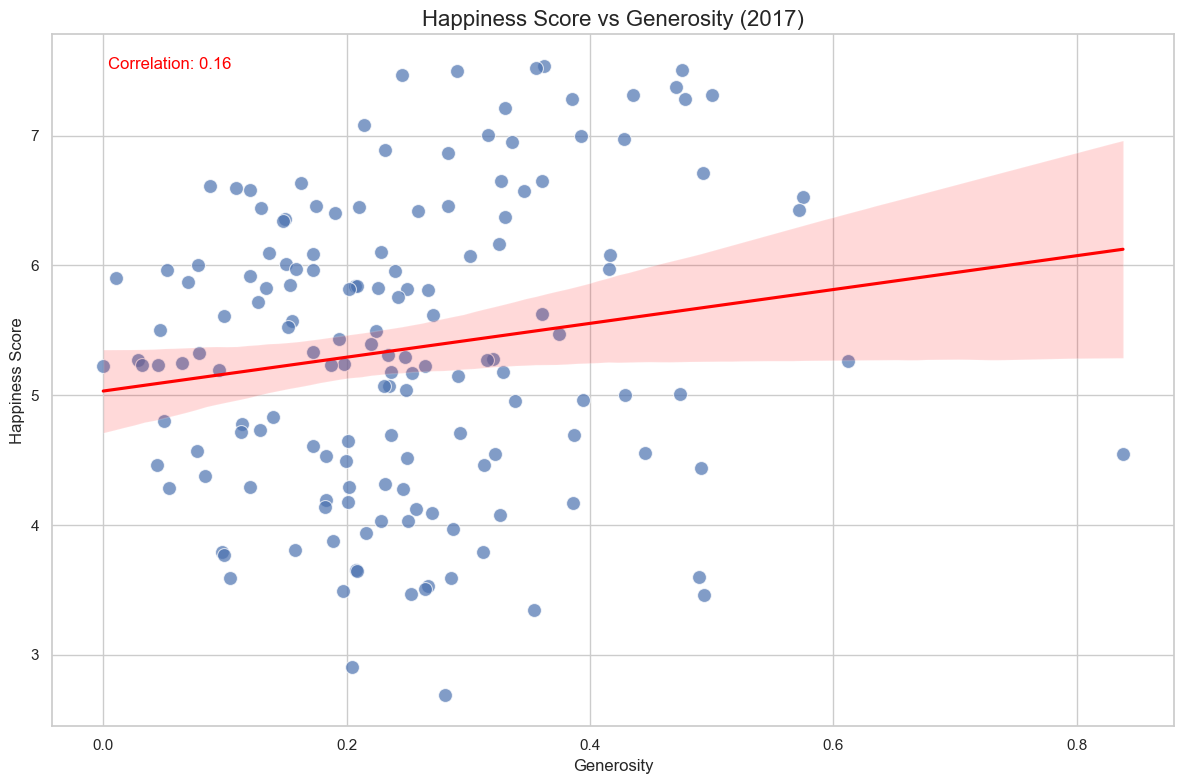

Plotting Generosity for 2018


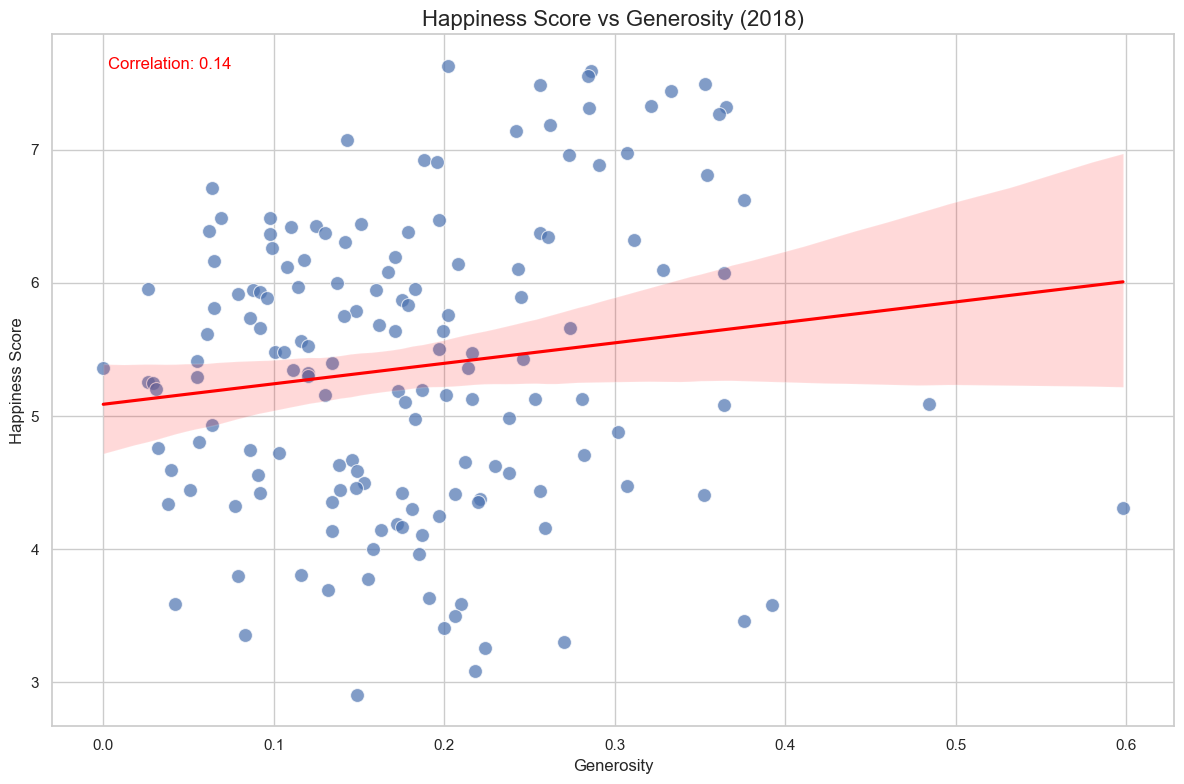

Plotting Generosity for 2019


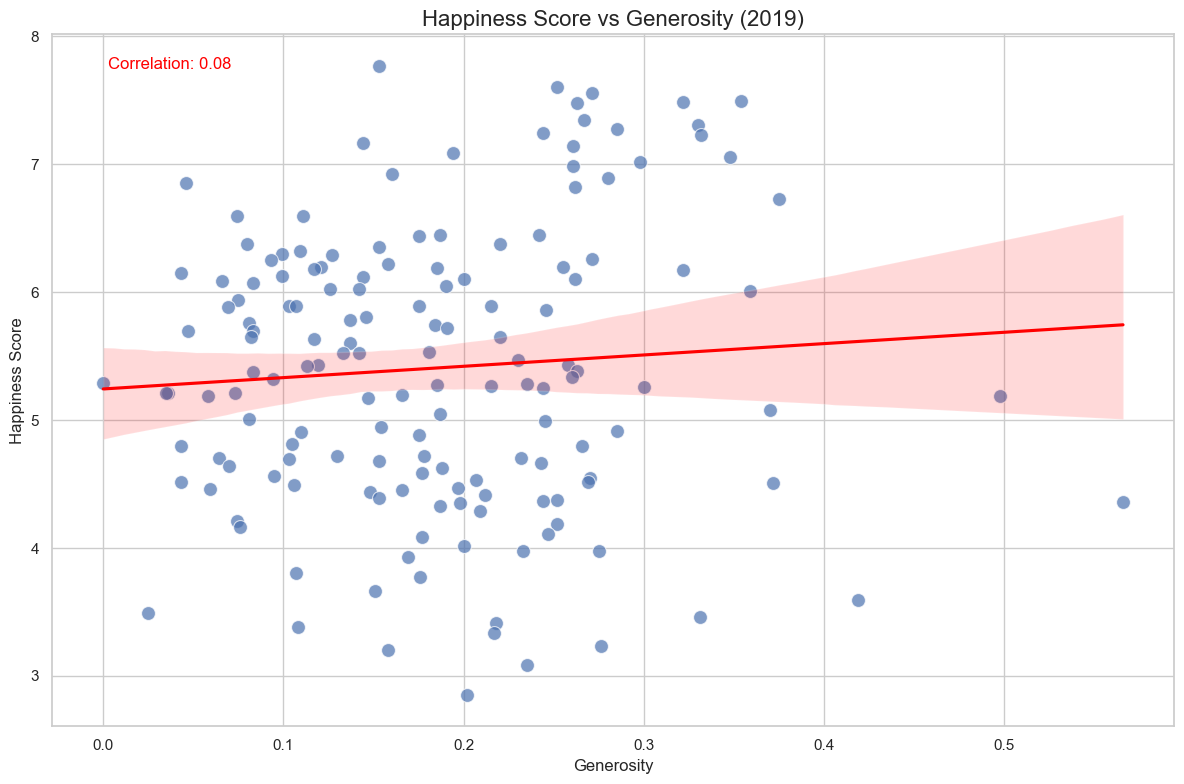

In [27]:
for var in variables:
    for year in years:
        print(f"Plotting {var} for {year}")
        plot_variable_with_regression(data[year], year, var)

In [28]:
for var in variables:
    print(f"{var} correlations by year: {corr_results[var]}")

Economy correlations by year: [0.781, 0.79, 0.812, 0.806, 0.794]
Family correlations by year: [0.741, 0.739, 0.753, 0.767, 0.777]
Freedom correlations by year: [0.568, 0.567, 0.57, 0.558, 0.567]
Trust correlations by year: [0.395, 0.402, 0.429, 0.405, 0.386]
Generosity correlations by year: [0.18, 0.157, 0.155, 0.136, 0.076]


In [29]:
correlation_df = pd.DataFrame(corr_results, index=[2015, 2016, 2017, 2018, 2019]).T
correlation_df["Mean Correlation"] = correlation_df.mean(axis=1).round(3)

correlation_df

2015   2016   2017   2018   2019  Mean Correlation
Economy     0.781  0.790  0.812  0.806  0.794             0.797
Family      0.741  0.739  0.753  0.767  0.777             0.755
Freedom     0.568  0.567  0.570  0.558  0.567             0.566
Trust       0.395  0.402  0.429  0.405  0.386             0.403
Generosity  0.180  0.157  0.155  0.136  0.076             0.141

The correlation table above confirms that Economy and Family are the two variables most strongly associated with happiness across all five years, with mean correlation values of 0.797 and 0.755, respectively. These results suggest that a nation's economic prosperity and the strength of its social support systems play a consistent and significant role in determining overall well-being.

Freedom also shows a moderate and remarkably stable correlation with happiness, averaging 0.566 across all years. This indicates that personal autonomy and the ability to make life choices are important, though slightly less influential than economic or familial factors.

In contrast, Trust (in government or public institutions) and Generosity exhibit noticeably weaker correlations, with average values of 0.403 and 0.141, respectively. This suggests that while these factors may contribute to happiness in some contexts, their overall influence is more limited or may be shaped by cultural and situational variability. The fact that a factor like Generosity has such a weak correlation is interesting, as people do not value variables like trust in the government or generosity between people, which one would think are important factors.

To better evaluate each variable’s impact on happiness, we created separate tables for slope and standard error, then combined them with the correlation data. This allowed us to assess not just the strength of each relationship, but also its consistency and reliability across years—providing a more complete picture of which factors most strongly and dependably predict national happiness.



In [31]:
from scipy.stats import linregress

# Initialize dictionaries to store regression results for each variable across years
slope_data = {var: [] for var in variables}
stderr_data = {var: [] for var in variables}
rval_data = {var: [] for var in variables}

for year in years:
    # Rename columns for consistency across years
    df = data[year].rename(columns=rename_mapping[year])
    for var in variables:
        x = df[var]
        y = df["Happiness"]
        
        # Perform linear regression for each variable vs Happiness
        slope, _, r_value, _, std_err = linregress(x, y)
        
        # Store rounded results
        slope_data[var].append(round(slope, 3))
        stderr_data[var].append(round(std_err, 3))
        rval_data[var].append(round(r_value, 3))

# Create DataFrames with years as columns and variables as rows
slope_df = pd.DataFrame(slope_data, index=years).T
stderr_df = pd.DataFrame(stderr_data, index=years).T
rval_df = pd.DataFrame(rval_data, index=years).T

# Add mean across all years for each variable
slope_df["Mean Slope"] = slope_df.mean(axis=1).round(3)
stderr_df["Mean Std Error"] = stderr_df.mean(axis=1).round(3)
rval_df["Mean Pearson R"] = rval_df.mean(axis=1).round(3)

# Combine summary stats into one table for easier comparison
combined_means_df = pd.DataFrame({
    "Mean Slope": slope_df["Mean Slope"],
    "Mean Std Error": stderr_df["Mean Std Error"],
    "Mean Pearson R": rval_df["Mean Pearson R"]
})

# Display tables for interpretation
print("\nSlope Table:")
display(slope_df)

print("\nStandard Error Table:")
display(stderr_df)

print("\nPearson R Table:")
display(rval_df)

print("\nCombined Means Table:")
display(combined_means_df)



Slope Table:


2015   2016   2017   2018   2019  Mean Slope
Economy     2.218  2.187  2.184  2.365  2.218       2.234
Family      3.113  3.164  2.964  2.843  2.891       2.995
Freedom     4.317  4.447  4.300  3.838  4.403       4.261
Trust       3.770  4.134  4.775  4.694  4.540       4.383
Generosity  1.630  1.339  1.303  1.540  0.886       1.340


Standard Error Table:


2015   2016   2017   2018   2019  Mean Std Error
Economy     0.142  0.136  0.127  0.140  0.137           0.136
Family      0.226  0.232  0.210  0.193  0.189           0.210
Freedom     0.501  0.519  0.501  0.462  0.516           0.500
Trust       0.702  0.756  0.813  0.856  0.875           0.800
Generosity  0.712  0.677  0.670  0.906  0.939           0.781


Pearson R Table:


2015   2016   2017   2018   2019  Mean Pearson R
Economy     0.781  0.790  0.812  0.806  0.794           0.797
Family      0.741  0.739  0.753  0.767  0.777           0.755
Freedom     0.568  0.567  0.570  0.558  0.567           0.566
Trust       0.395  0.402  0.429  0.405  0.386           0.403
Generosity  0.180  0.157  0.155  0.136  0.076           0.141


Combined Means Table:


Mean Slope  Mean Std Error  Mean Pearson R
Economy          2.234           0.136           0.797
Family           2.995           0.210           0.755
Freedom          4.261           0.500           0.566
Trust            4.383           0.800           0.403
Generosity       1.340           0.781           0.141

Across all five years, the variables with the highest average slopes were Trust (4.383) and Freedom (4.261), indicating that increases in these variables are associated with the largest increases in happiness scores. However, their high standard errors—0.800 for Trust and 0.500 for Freedom—suggest that these relationships are more variable and less reliable than those of Economy or Family. In contrast, Economy and Family not only had strong average slopes (2.234 and 2.995, respectively), but also the lowest standard errors (0.136 and 0.210), along with the highest mean Pearson correlation coefficients (0.797 and 0.755). This reinforces the conclusion that economic strength and social support are the most consistent and statistically robust predictors of national happiness.



$ \textbf{Discussion and Conclusion} $

This project set out to explore which factors most significantly influence national happiness using data from the World Happiness Report across five years (2015–2019). The results from both the statistical tables and the regression plots provide a clear picture of the relative strength, consistency, and reliability of each factor.

Economy and Family stood out as the most robust predictors of happiness. Not only did they show high average slopes (2.234 and 2.995, respectively), but they also had the lowest standard errors (0.136 and 0.210) and the strongest average Pearson correlations (0.797 and 0.755). This suggests that increases in GDP per capita and social support are consistently associated with higher national happiness scores, both statistically and visually. In the regression plots, these two variables showed tightly clustered, positively sloped trends across all years.

In contrast, while Trust and Freedom had the highest slopes (4.383 and 4.261), their high standard errors (0.800 and 0.500) and weaker correlations (0.403 and 0.566) suggest that their relationships with happiness are more variable. For example, countries with high freedom scores didn't always have high happiness scores, indicating the presence of moderating factors or potential cultural influences. The grid of regression plots clearly supports this, with greater spread and inconsistency in these variables’ trend lines. The high slopes suggest they have the ability to affect happiness scores a lot after factors such as Economy and Family, but in smaller GDP countries, these factors are not valued much, and an increase in GDP would lead to consistent happiness.

Generosity had the weakest statistical association with happiness. Its low slope (1.340), high standard error (0.781), and very weak correlation (0.141) indicate that it likely plays a minimal or context-specific role. This was also apparent in the visualisations, which showed a flat or scattered pattern with no clear trend.

Notably, Generosity shows a clear decline both in slope and Pearson correlation over the five-year period. Its mean slope (1.340) is already the lowest among all variables, and it drops significantly in 2019 to 0.886—a stark contrast to its earlier values around 1.6. Similarly, the Pearson correlation weakens year by year, falling from 0.180 in 2015 to just 0.076 in 2019, bringing the mean to 0.141. This suggests that generosity’s relationship with happiness not only remains weak overall but also appears to be diminishing in importance over time, potentially due to shifting cultural values or its limited influence in comparison to stronger predictors like economic strength or family support.

While the results are consistent across years, limitations remain. Regional effects could only be visualised for 2015 and 2016 due to missing data in later years. Additionally, we focused on bivariate linear relationships and did not account for potential interactions between variables or nonlinear effects.

In future work, multivariate regression or machine learning models could be used to capture more complex dynamics and interactions between economic, social, and institutional factors. Additionally, with more time, we can assign countries to regions as in the 2015 and 2016 datasets to see which region performs the best and what the most important factors for happiness are region-wise.

Nevertheless, this project clearly shows that economic well-being and strong social support systems are the most reliable contributors to national happiness, a conclusion well supported by both data and visuals.



$ \textbf{References} $

Network, Sustainable Development Solutions. “World Happiness Report.” Kaggle, 27 Nov. 2019, www.kaggle.com/datasets/unsdsn/world-happiness. 

“World Happiness Report.” Gallup.Com, Gallup, 31 Mar. 2025, www.gallup.com/analytics/349487/world-happiness-report.aspx. 